## Importing the libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import Normalize
import seaborn as sns

## Loading the dataset

In [3]:
df=pd.read_excel('air_quality_data.xlsx')

In [4]:
df.head()

WHO Region ISO3 WHO Country Name City or Locality  \
0  Eastern Mediterranean Region  AFG      Afghanistan            Kabul   
1               European Region  ALB          Albania           Durres   
2               European Region  ALB          Albania           Durres   
3               European Region  ALB          Albania          Elbasan   
4               European Region  ALB          Albania          Elbasan   

   Measurement Year  PM2.5 (μg/m3)  PM10 (μg/m3)  NO2 (μg/m3)  \
0              2019         119.77           NaN          NaN   
1              2015            NaN         17.65        26.63   
2              2016          14.32         24.56        24.78   
3              2015            NaN           NaN        23.96   
4              2016            NaN           NaN        26.26   

   PM25 temporal coverage (%)  PM10 temporal coverage (%)  \
0                        18.0                         NaN   
1                         NaN                         NaN   
2                         NaN                         NaN   
3                         NaN                         NaN   
4                         NaN                         NaN   

   NO2 temporal coverage (%)  \
0                        NaN   
1                  83.961187   
2                  87.932605   
3                  97.853881   
4                  96.049636   

                                           Reference  \
0  U.S. Department of State, United States Enviro...   
1   European Environment Agency (downloaded in 2021)   
2   European Environment Agency (downloaded in 2021)   
3   European Environment Agency (downloaded in 2021)   
4   European Environment Agency (downloaded in 2021)   

  Number and type of monitoring stations  Version of the database  Status  
0                                    NaN                     2022     NaN  
1                                    NaN                     2022     NaN  
2                                    NaN                     2022     NaN  
3                                    NaN                     2022     NaN  
4                                    NaN                     2022     NaN

In [5]:
df.shape

(32191, 15)

Observation: 
There are 32191 records

## Data preprocessing

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32191 entries, 0 to 32190
Data columns (total 15 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   WHO Region                              32190 non-null  object 
 1   ISO3                                    32191 non-null  object 
 2   WHO Country Name                        32191 non-null  object 
 3   City or Locality                        32191 non-null  object 
 4   Measurement Year                        32191 non-null  int64  
 5   PM2.5 (μg/m3)                           15048 non-null  float64
 6   PM10 (μg/m3)                            21109 non-null  float64
 7   NO2 (μg/m3)                             22200 non-null  float64
 8   PM25 temporal coverage (%)              7275 non-null   float64
 9   PM10 temporal coverage (%)              5381 non-null   float64
 10  NO2 temporal coverage (%)               19890 non-null  fl

In [8]:
df.nunique()

WHO Region                                   6
ISO3                                       118
WHO Country Name                           118
City or Locality                          6874
Measurement Year                            21
PM2.5 (μg/m3)                             4749
PM10 (μg/m3)                              5081
NO2 (μg/m3)                               4633
PM25 temporal coverage (%)                2307
PM10 temporal coverage (%)                2084
NO2 temporal coverage (%)                 6496
Reference                                  251
Number and type of monitoring stations     634
Version of the database                      3
Status                                       0
dtype: int64

### Handling with null values

In [9]:
df['Status']

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
32186   NaN
32187   NaN
32188   NaN
32189   NaN
32190   NaN
Name: Status, Length: 32191, dtype: float64

In [10]:
df['Status'].isnull().sum()

32191

Observation: All the values od Status column are null

In [11]:
# Drop Status Column
df.drop('Status',axis=1,inplace=True)

In [12]:
df.columns

Index(['WHO Region', 'ISO3', 'WHO Country Name', 'City or Locality',
       'Measurement Year', 'PM2.5 (μg/m3)', 'PM10 (μg/m3)', 'NO2 (μg/m3)',
       'PM25 temporal coverage (%)', 'PM10 temporal coverage (%)',
       'NO2 temporal coverage (%)', 'Reference',
       'Number and type of monitoring stations', 'Version of the database'],
      dtype='object')

In [17]:
df['PM2.5 (μg/m3)'].isnull().sum()

17143

In [29]:
df['PM10 (μg/m3)'].isnull().sum()

11082

In [18]:
df['NO2 (μg/m3)'].isnull().sum()

9991

In [19]:
# Taking out all those records that are not null in the PM2.5, PM10 and NO2 columns for visualizaton purposes
df_pm2_5=df[df['PM2.5 (μg/m3)'].notna()]
df_pm10=df[df['PM10 (μg/m3)'].notna()]
df_NO2=df[df['NO2 (μg/m3)'].notna()]

In [20]:
df_pm2_5['WHO Region'].unique()

array(['Eastern Mediterranean Region', 'European Region',
       'Region of the Americas', 'Western Pacific Region',
       'South East Asia Region', 'African Region'], dtype=object)

In [21]:
df_pm10['WHO Region'].unique()

array(['European Region', 'Eastern Mediterranean Region',
       'Region of the Americas', 'Western Pacific Region',
       'South East Asia Region', 'African Region', nan], dtype=object)

In [22]:
df_pm10=df_pm10.dropna(subset=['WHO Region'])

In [23]:
df_pm10['WHO Region'].unique()

array(['European Region', 'Eastern Mediterranean Region',
       'Region of the Americas', 'Western Pacific Region',
       'South East Asia Region', 'African Region'], dtype=object)

In [24]:
df_NO2['WHO Region'].isnull().sum()

1

In [25]:
df_NO2=df_NO2.dropna(subset=['WHO Region'])

#### Grouping the WHO Region and counting the number of PM2.5 values for each Region

In [26]:
df_pm2_5.groupby('WHO Region')['PM2.5 (μg/m3)'].count()

WHO Region
African Region                   125
Eastern Mediterranean Region     221
European Region                 7591
Region of the Americas          2120
South East Asia Region           553
Western Pacific Region          4438
Name: PM2.5 (μg/m3), dtype: int64

In [27]:
df_pm10.groupby('WHO Region')['PM10 (μg/m3)'].count()

WHO Region
African Region                    160
Eastern Mediterranean Region      288
European Region                 16278
Region of the Americas           2266
South East Asia Region           1419
Western Pacific Region            697
Name: PM10 (μg/m3), dtype: int64

In [28]:
df_NO2.groupby('WHO Region')['NO2 (μg/m3)'].count()

WHO Region
African Region                    124
Eastern Mediterranean Region      149
European Region                 16958
Region of the Americas           2142
South East Asia Region           2210
Western Pacific Region            616
Name: NO2 (μg/m3), dtype: int64

## Visualization

### Bar plot (average PM value for different countries and regions)

In [30]:
def plot_bar(array,region,PM,figsize=(28,8),minimum_val=20):
    '''This function plots the bar plot of the countries of the given region with PM10 or PM2.5 values'''
    
    import warnings
    warnings.filterwarnings("ignore")
    
    plt.figure(figsize=figsize)

    countries=array.groupby('country').mean().index
    countries_pm=array.groupby('country').mean().iloc[:, 0].values
    countries_pm=[round(pm,2) for pm in countries_pm] # rounding the values

    norm = Normalize(vmin=min(countries_pm)-minimum_val, vmax=max(countries_pm))
    colors = plt.cm.Blues(norm(countries_pm))

    plt.barh(countries, countries_pm, color=colors)

    for country, pm in zip(countries, countries_pm):
        plt.text(pm, country, str(pm), va='center',fontsize=16)

    plt.xticks(fontsize=19)  
    plt.yticks(fontsize=19)

    # Add a color bar to show the value-color mapping
    sm = plt.cm.ScalarMappable(cmap=plt.cm.Blues, norm=norm)
    sm.set_array([])
    colorbar = plt.colorbar(sm, label='Values')

    colorbar.ax.yaxis.label.set_size(19)
    colorbar.ax.yaxis.set_tick_params(labelsize=19)

    plt.title(f"Average value of {PM} of {region} Countries",fontsize=29)
    plt.show()

#### Bar plot for PM 2.5

In [31]:
arr_african_pm2_5=df_pm2_5[df_pm2_5['WHO Region']=='African Region'][['WHO Country Name','PM2.5 (μg/m3)']].values
arr_east_pm2_5=df_pm2_5[df_pm2_5['WHO Region']=='Eastern Mediterranean Region'][['WHO Country Name','PM2.5 (μg/m3)']].values
arr_europe_pm2_5=df_pm2_5[df_pm2_5['WHO Region']=='European Region'][['WHO Country Name','PM2.5 (μg/m3)']].values
arr_america_pm2_5=df_pm2_5[df_pm2_5['WHO Region']=='Region of the Americas'][['WHO Country Name','PM2.5 (μg/m3)']].values
arr_se_asia_pm2_5=df_pm2_5[df_pm2_5['WHO Region']=='South East Asia Region'][['WHO Country Name','PM2.5 (μg/m3)']].values
arr_west_pacific_pm2_5=df_pm2_5[df_pm2_5['WHO Region']=='Western Pacific Region'][['WHO Country Name','PM2.5 (μg/m3)']].values

In [32]:
arr_african_pm2_5=pd.DataFrame(arr_african_pm2_5,columns=['country','pm_2.5'])
arr_east_pm2_5=pd.DataFrame(arr_east_pm2_5,columns=['country','pm_2.5'])
arr_europe_pm2_5=pd.DataFrame(arr_europe_pm2_5,columns=['country','pm_2.5'])
arr_america_pm2_5=pd.DataFrame(arr_america_pm2_5,columns=['country','pm_2.5'])
arr_se_asia_pm2_5=pd.DataFrame(arr_se_asia_pm2_5,columns=['country','pm_2.5'])
arr_west_pacific_pm2_5=pd.DataFrame(arr_west_pacific_pm2_5,columns=['country','pm_2.5'])

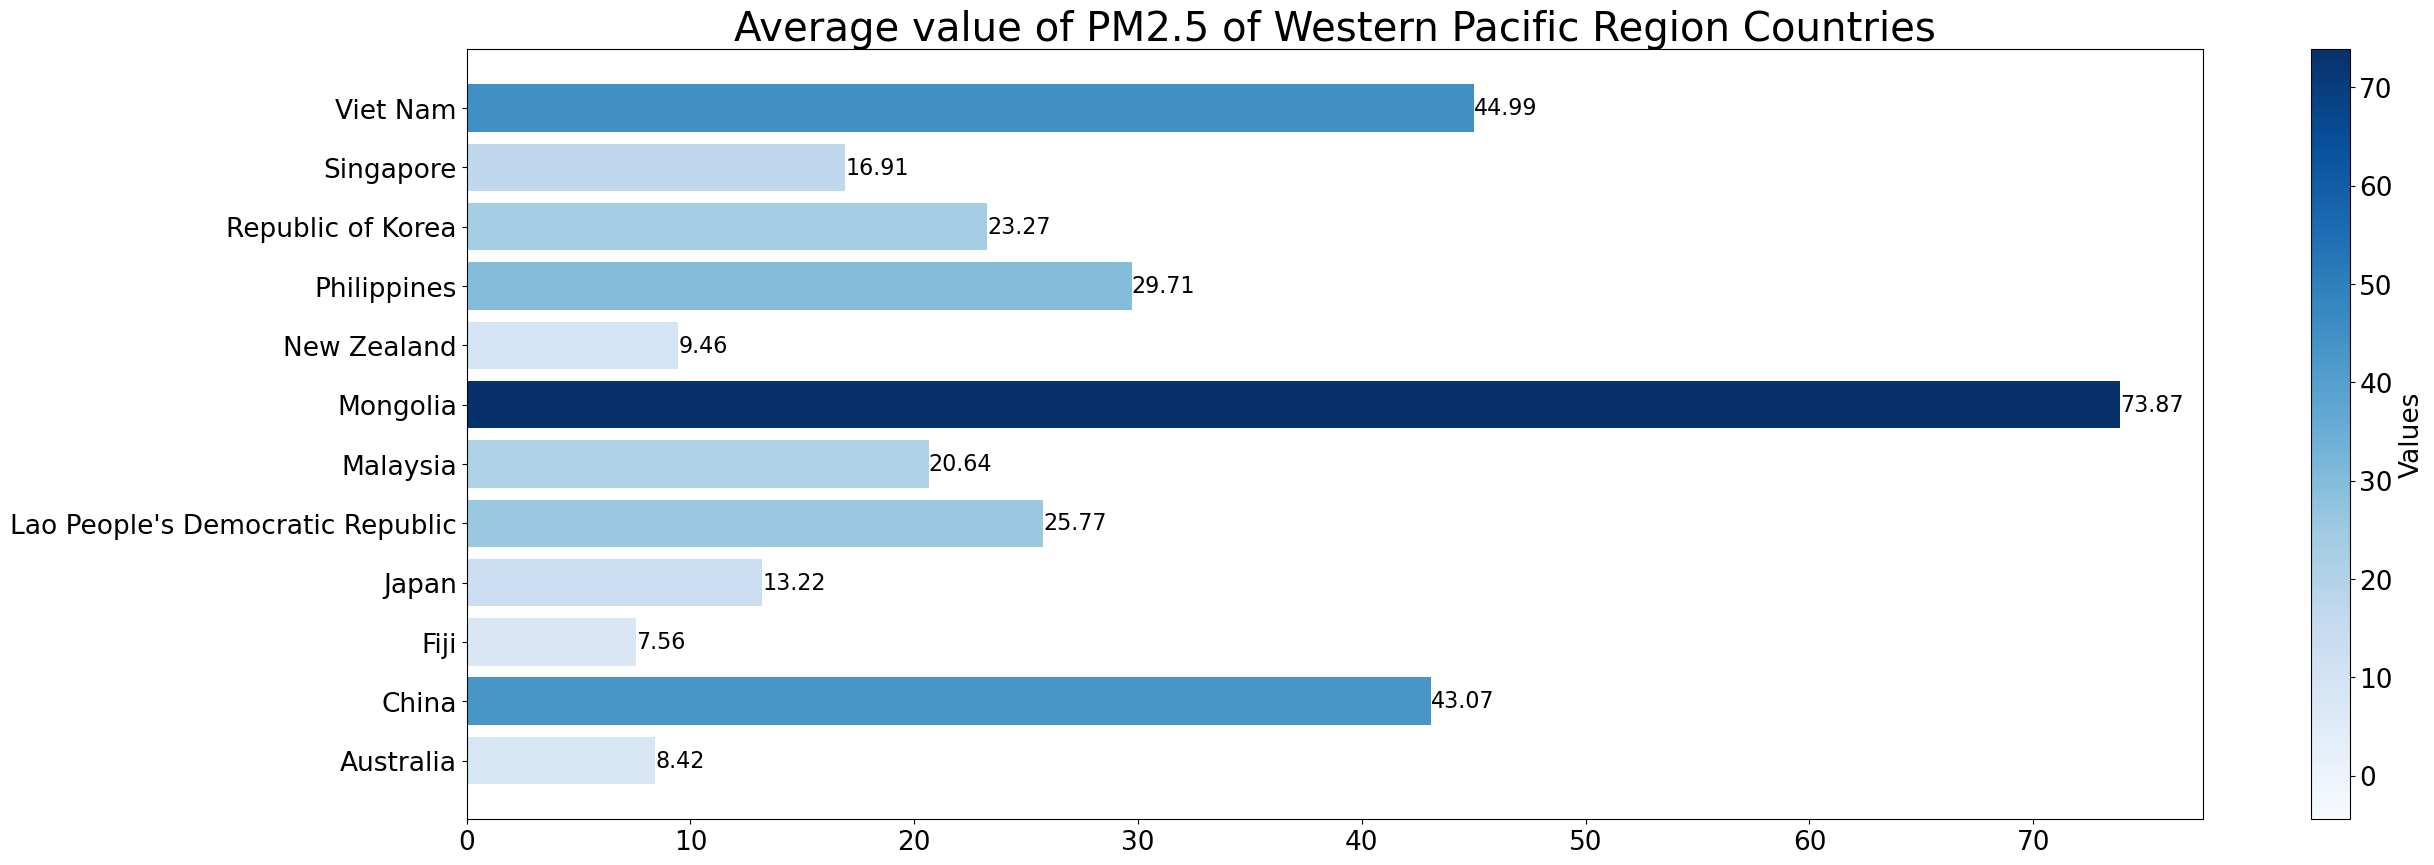

In [33]:
plot_bar(arr_west_pacific_pm2_5,'Western Pacific Region','PM2.5',(28,10),12)

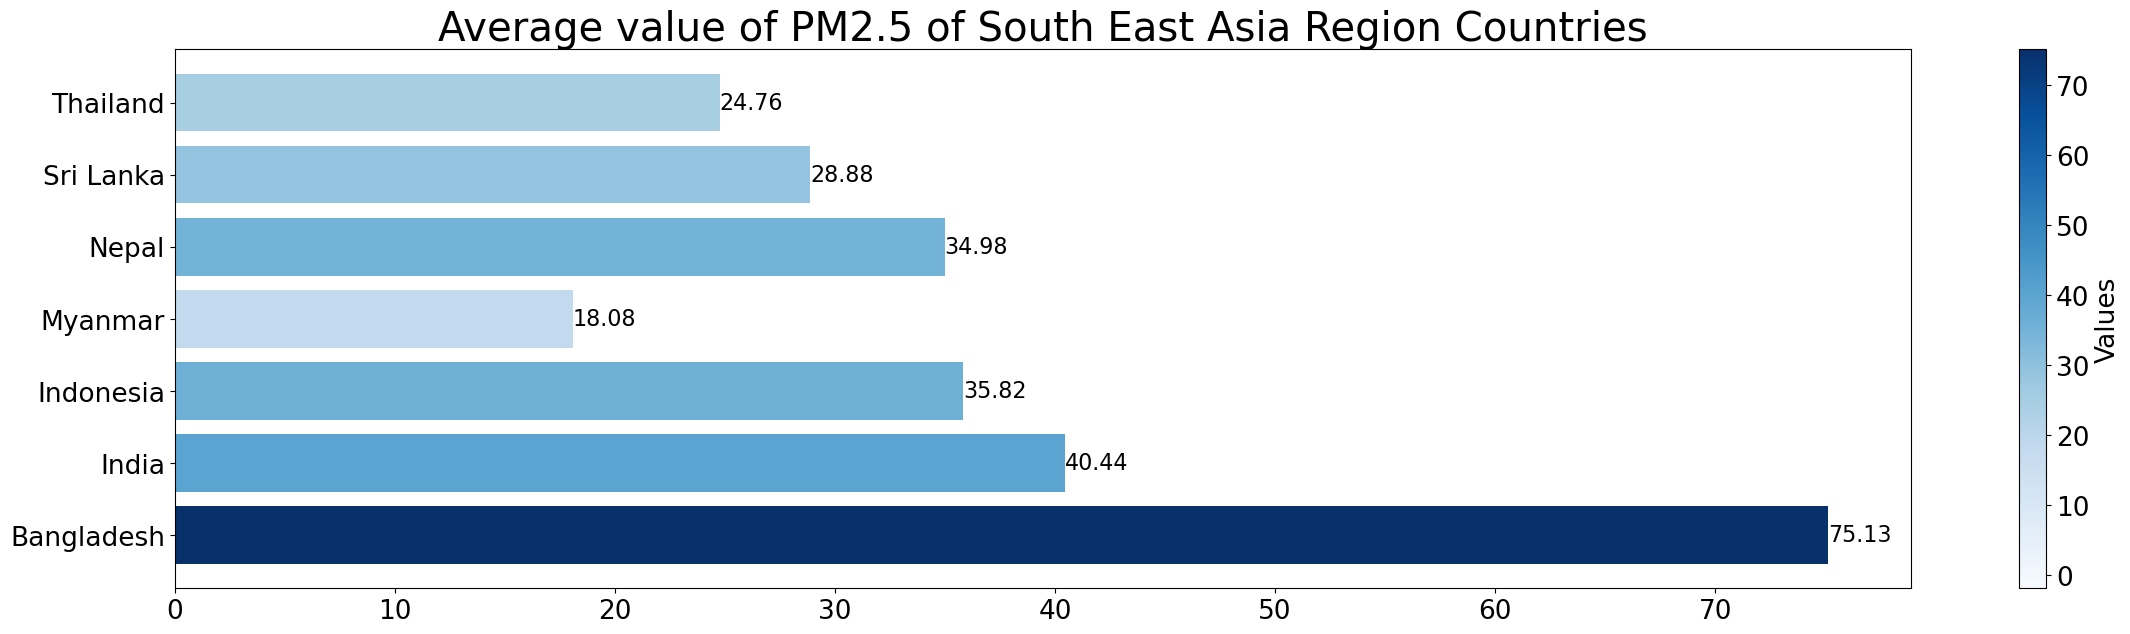

In [34]:
plot_bar(arr_se_asia_pm2_5,'South East Asia Region','PM2.5',(28,7))

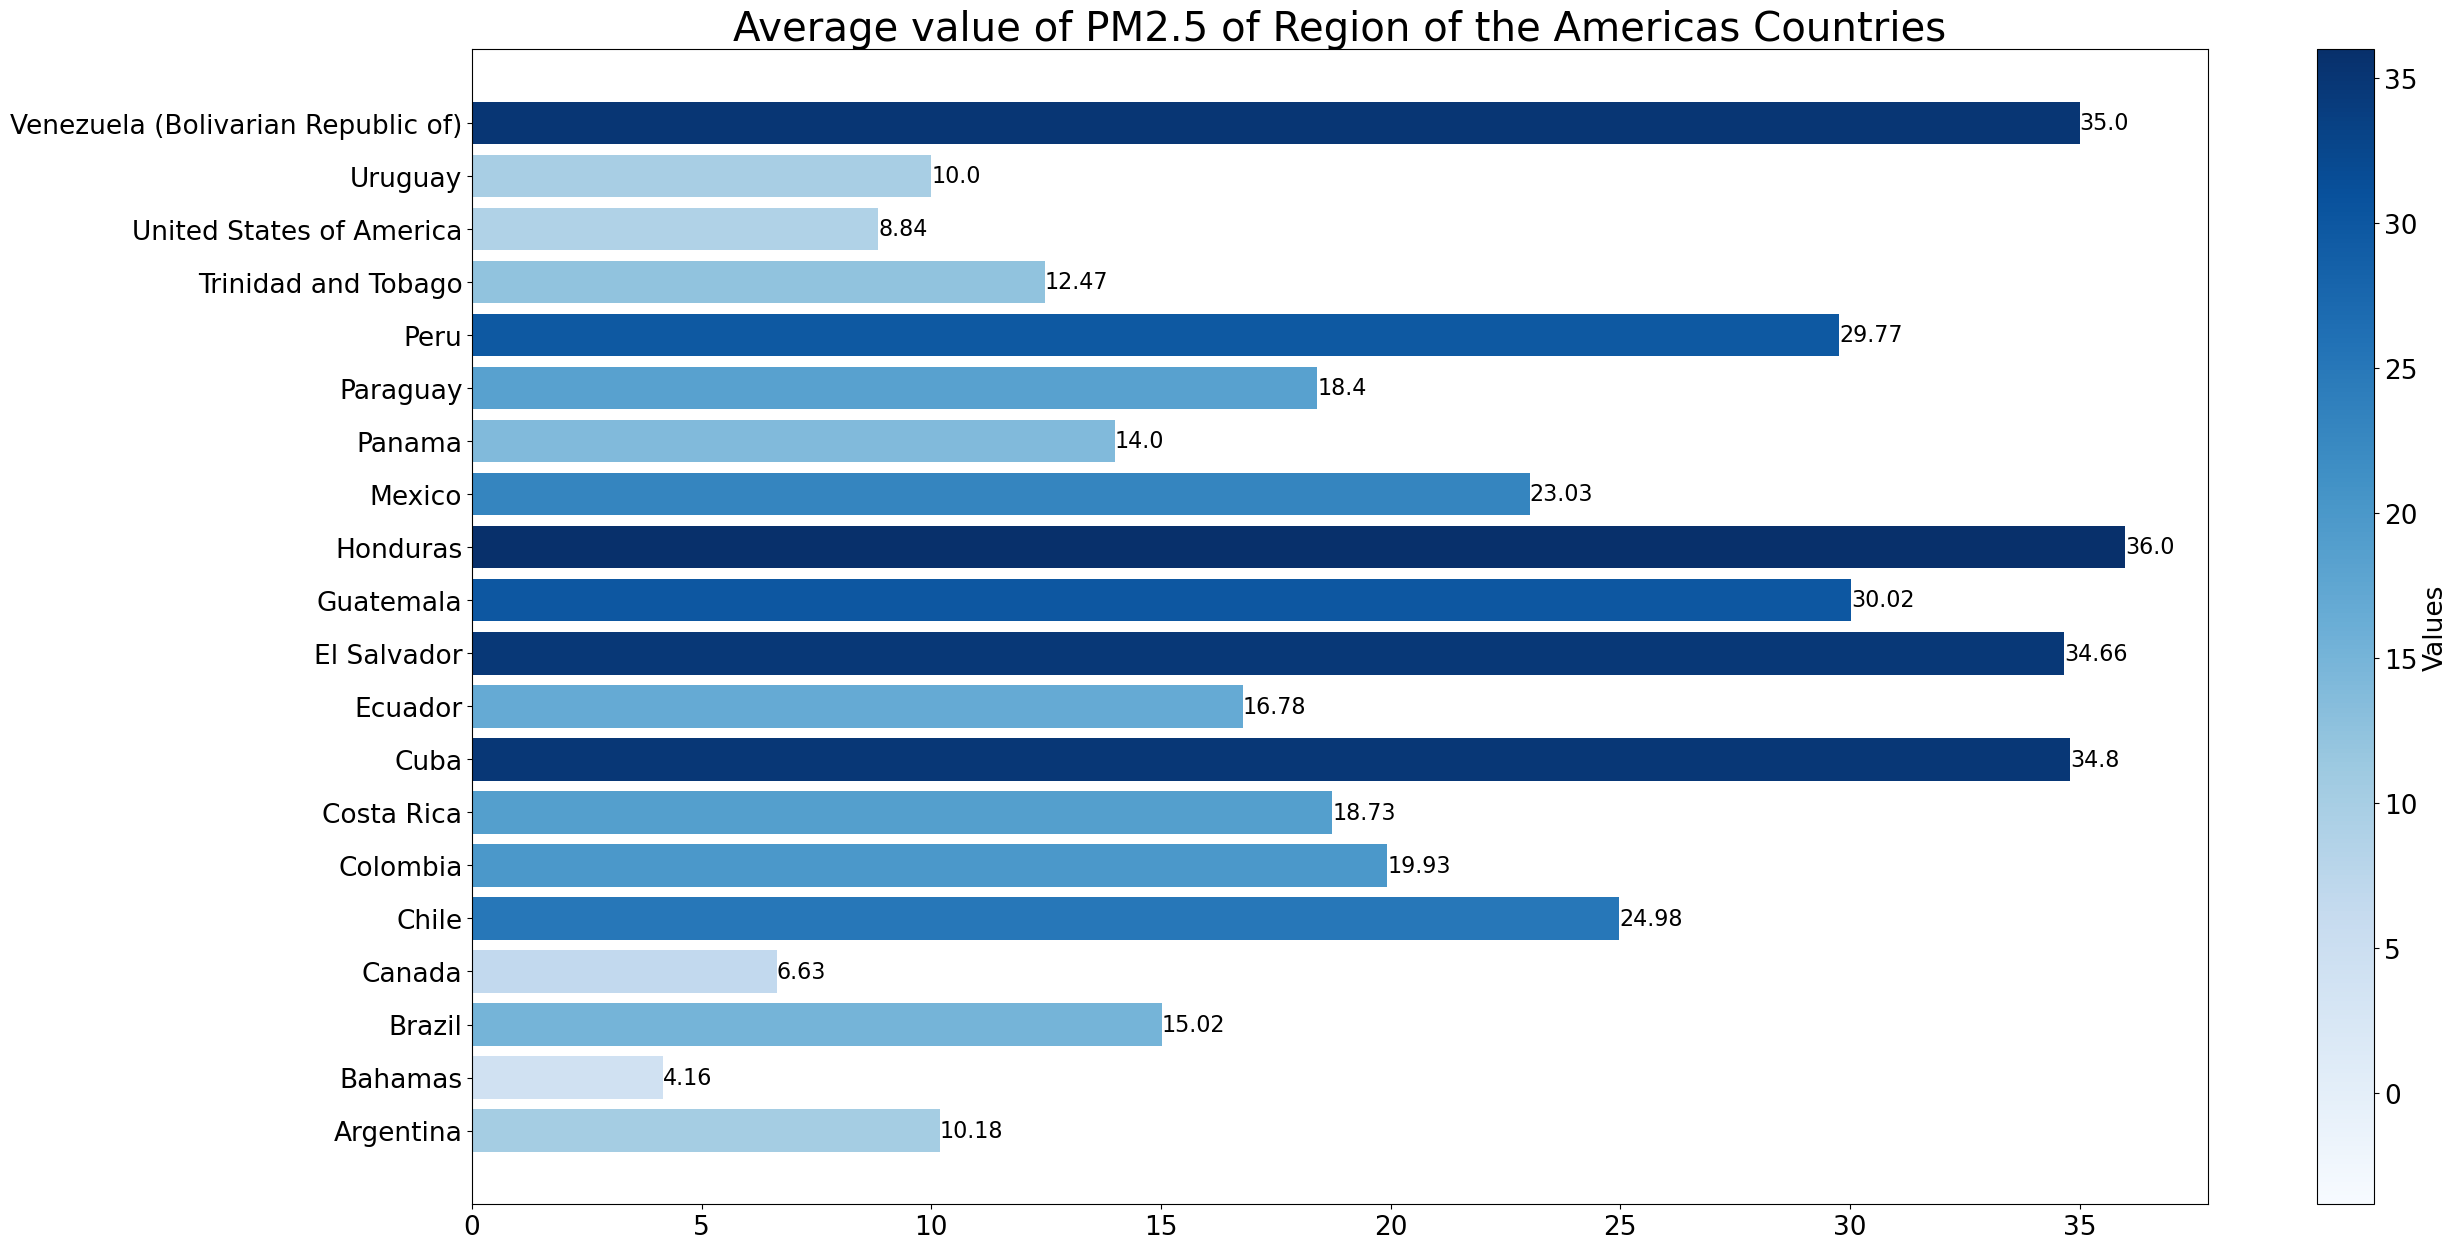

In [35]:
plot_bar(arr_america_pm2_5,'Region of the Americas','PM2.5',(28,15),8)

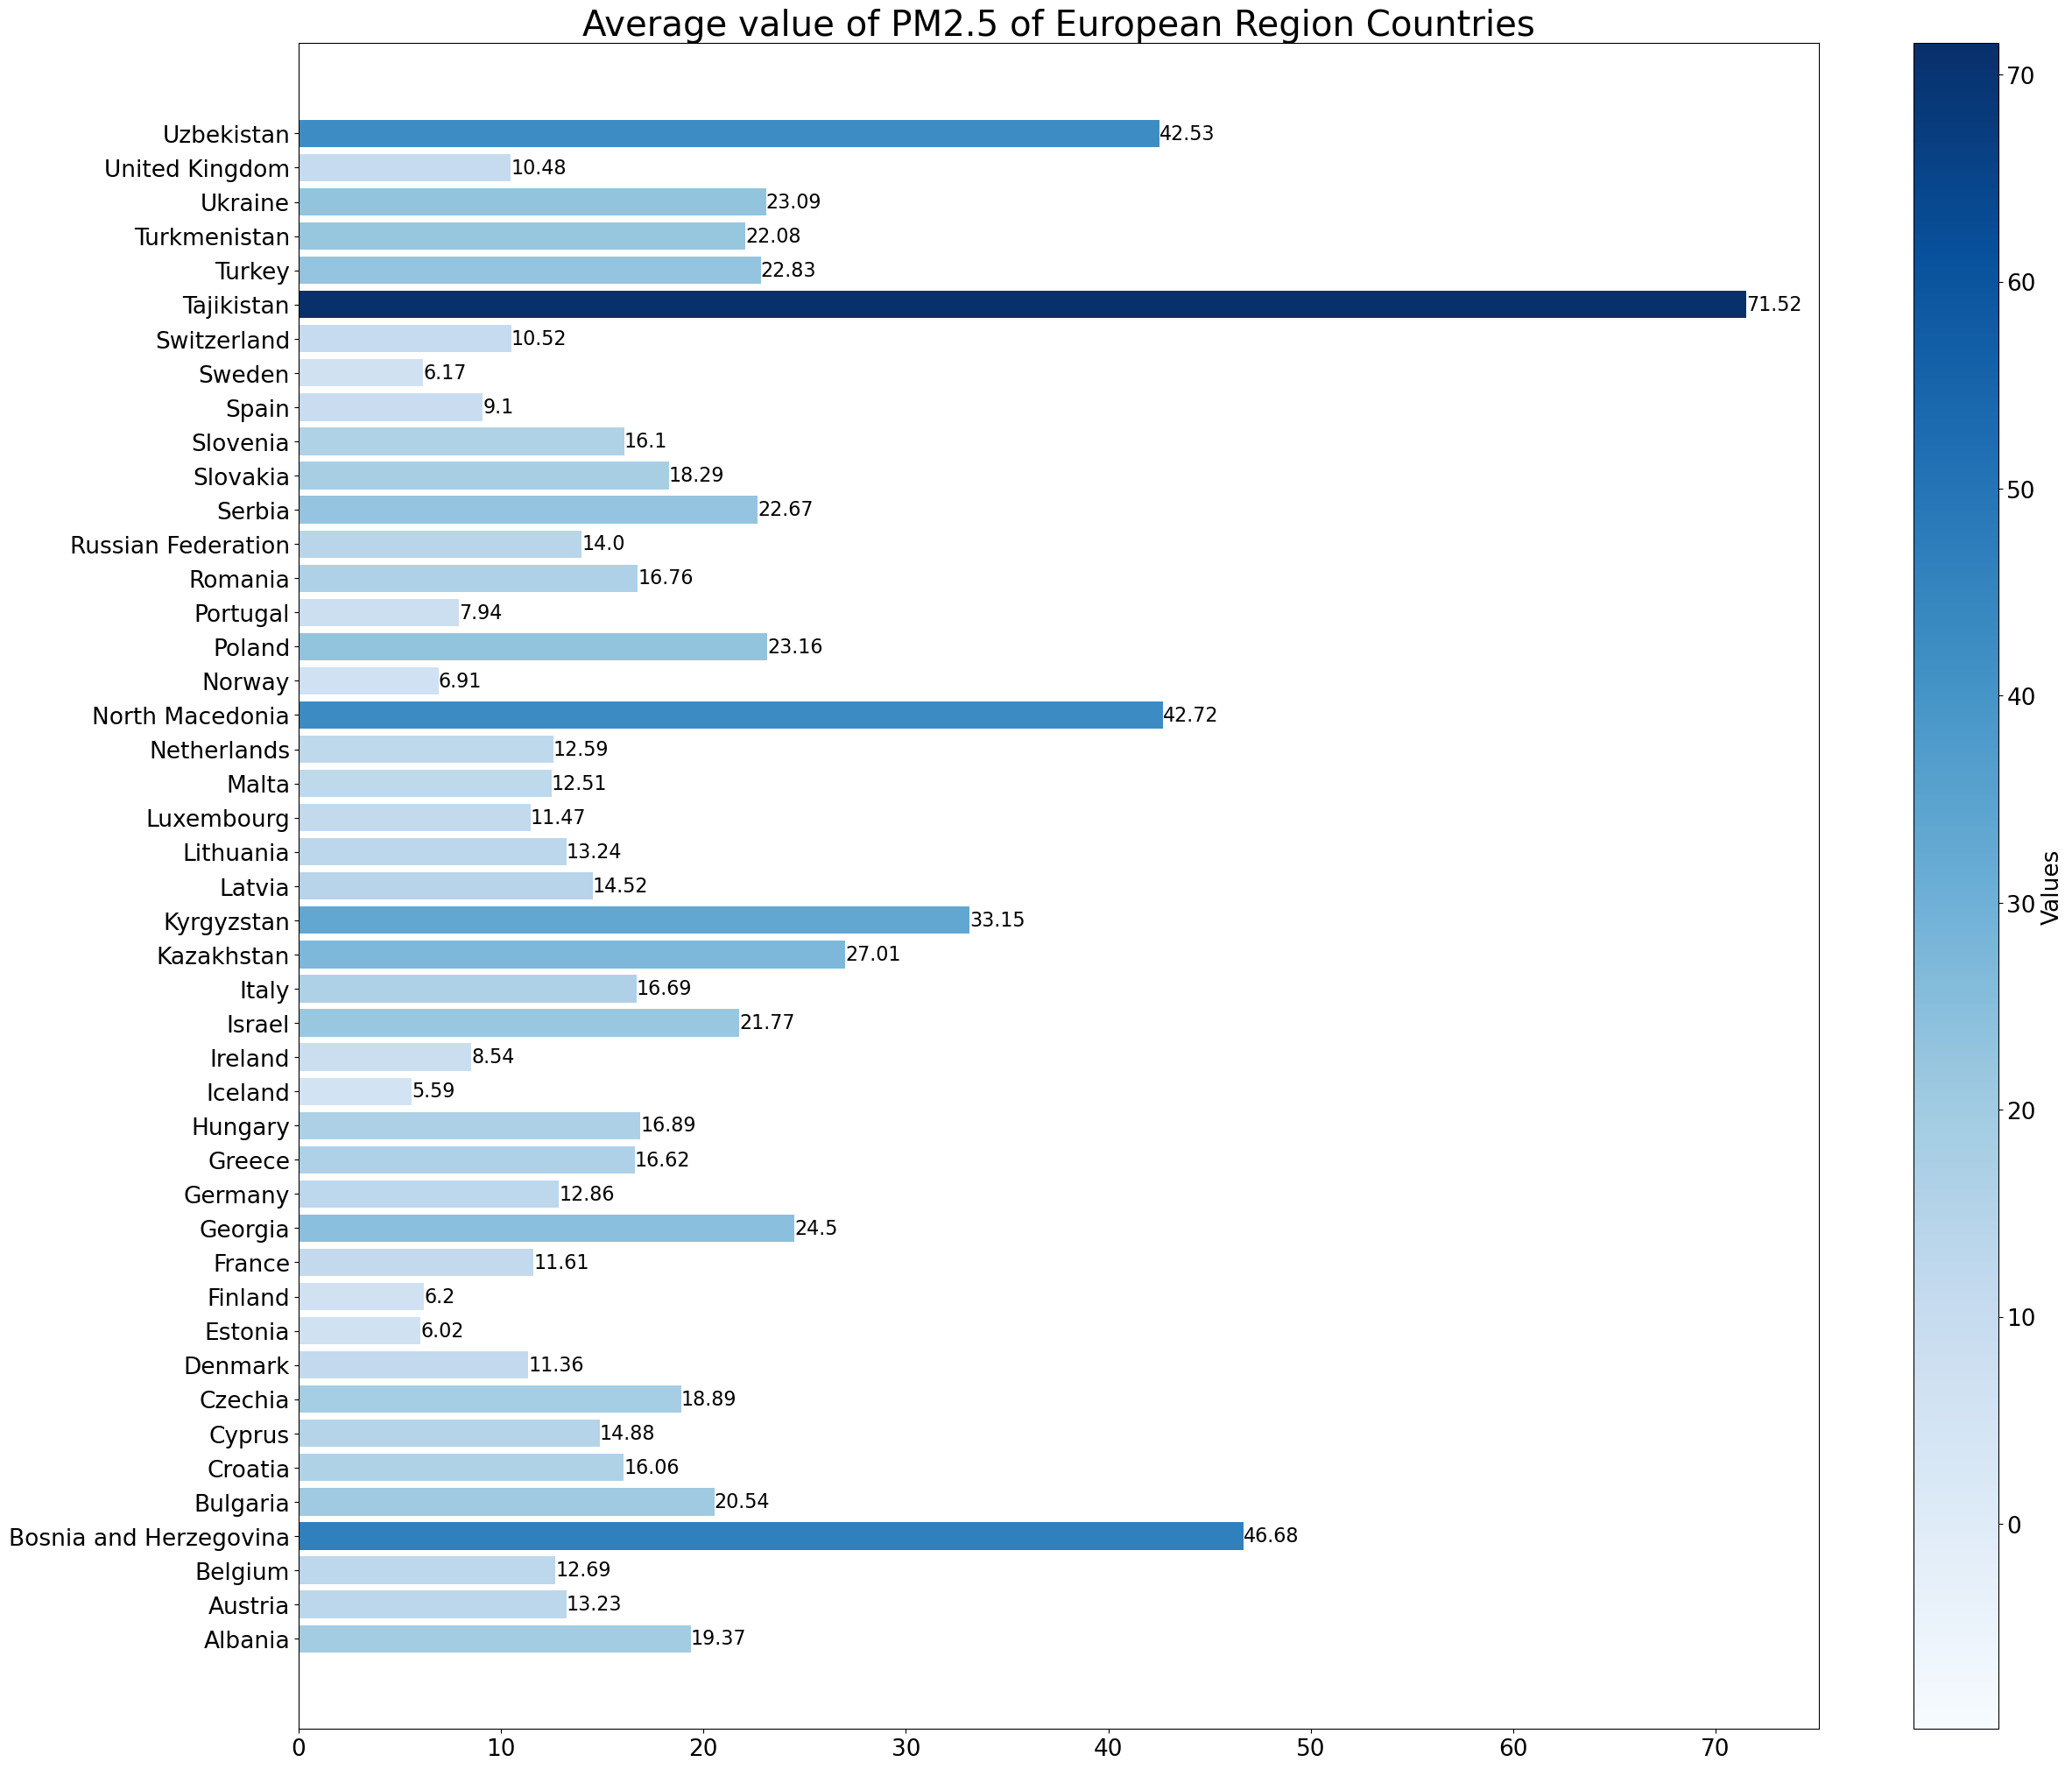

In [36]:
plot_bar(arr_europe_pm2_5,'European Region','PM2.5',(28,25),15.5)

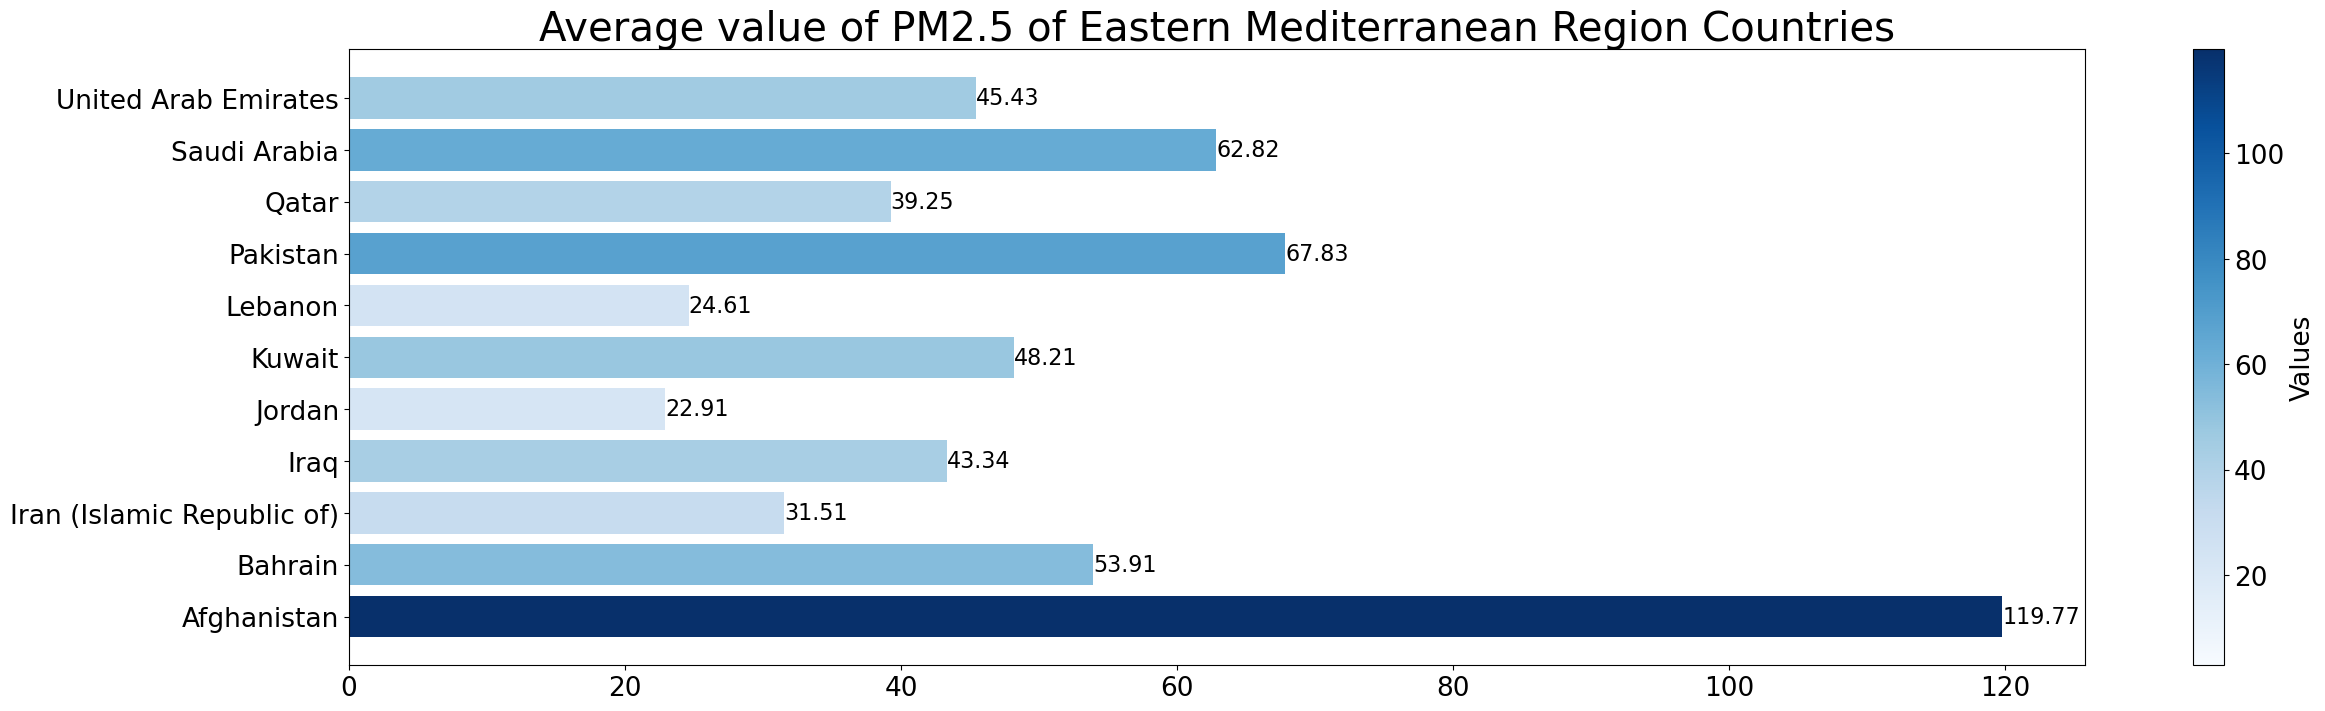

In [37]:
plot_bar(arr_east_pm2_5,'Eastern Mediterranean Region','PM2.5')

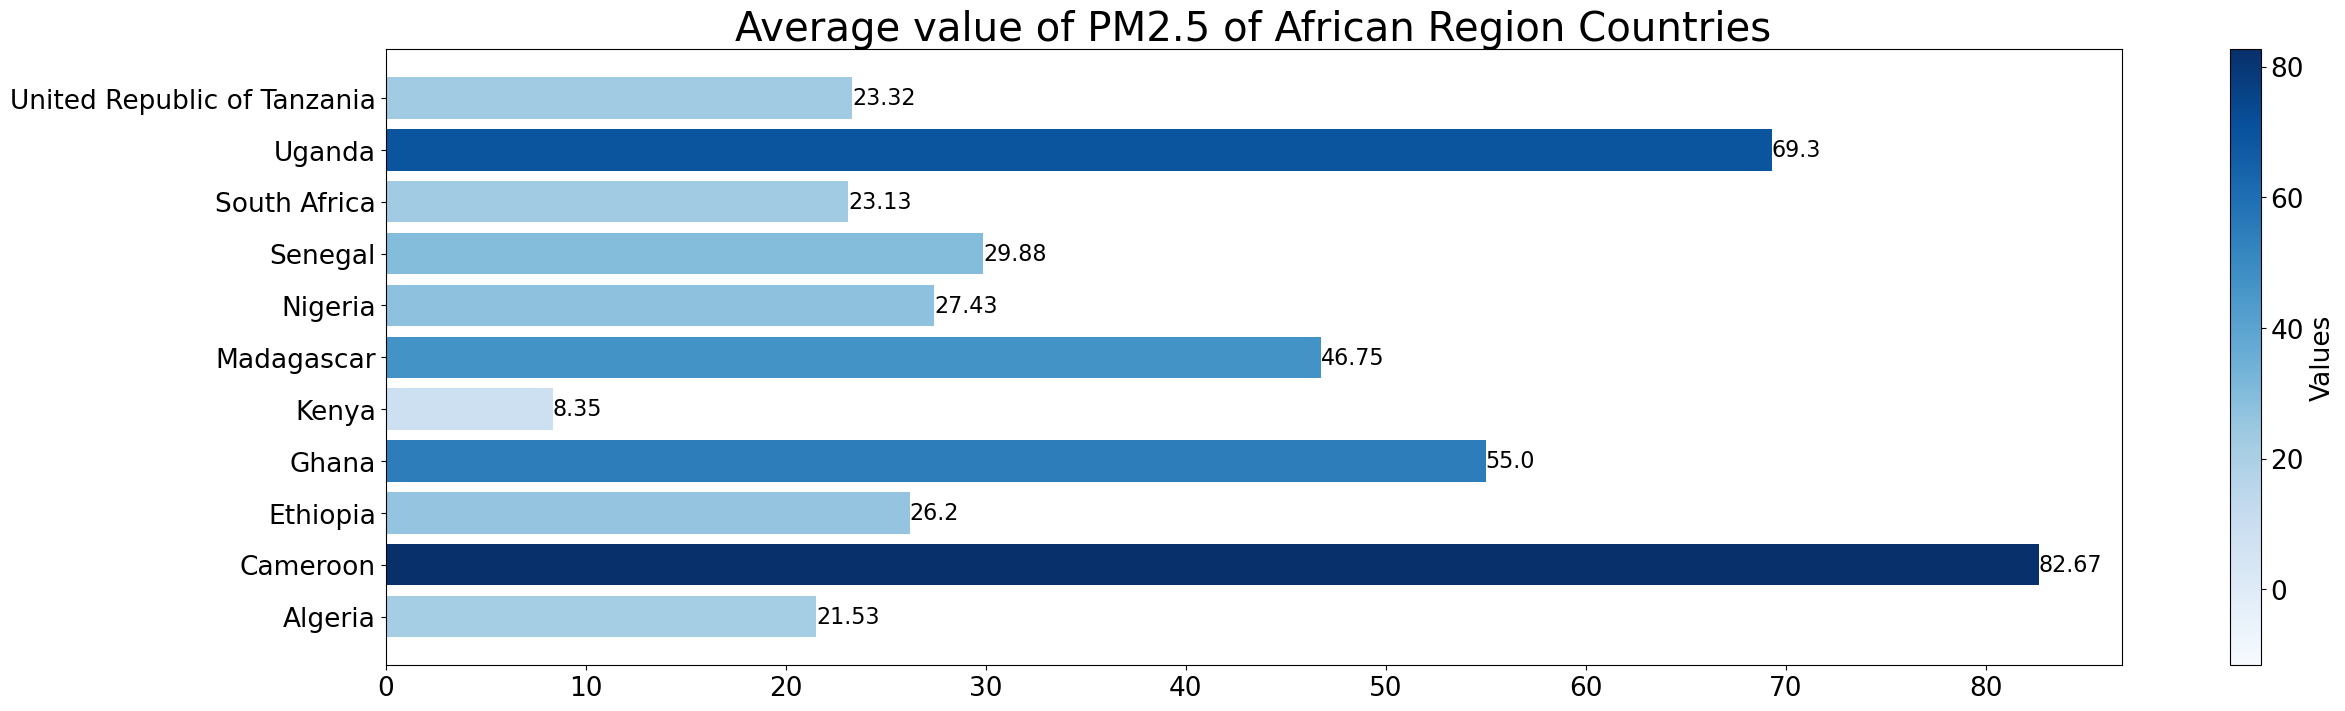

In [38]:
plot_bar(arr_african_pm2_5,'African Region','PM2.5')

#### Bar plot for PM 10

In [39]:
arr_europe_pm10=df_pm10[df_pm10['WHO Region']=='European Region'][['WHO Country Name','PM10 (μg/m3)']].values
arr_east_pm10=df_pm10[df_pm10['WHO Region']=='Eastern Mediterranean Region'][['WHO Country Name','PM10 (μg/m3)']].values
arr_america_pm10=df_pm10[df_pm10['WHO Region']=='Region of the Americas'][['WHO Country Name','PM10 (μg/m3)']].values
arr_pacific_pm10=df_pm10[df_pm10['WHO Region']=='Western Pacific Region'][['WHO Country Name','PM10 (μg/m3)']].values
arr_se_asia_pm10=df_pm10[df_pm10['WHO Region']=='South East Asia Region'][['WHO Country Name','PM10 (μg/m3)']].values
arr_african_pm10=df_pm10[df_pm10['WHO Region']=='African Region'][['WHO Country Name','PM10 (μg/m3)']].values

In [40]:
arr_europe_pm10=pd.DataFrame(arr_europe_pm10,columns=['country','pm_10'])
arr_east_pm10=pd.DataFrame(arr_east_pm10,columns=['country','pm_10'])
arr_america_pm10=pd.DataFrame(arr_america_pm10,columns=['country','pm_10'])
arr_pacific_pm10=pd.DataFrame(arr_pacific_pm10,columns=['country','pm_10'])
arr_se_asia_pm10=pd.DataFrame(arr_se_asia_pm10,columns=['country','pm_10'])
arr_african_pm10=pd.DataFrame(arr_african_pm10,columns=['country','pm_10'])

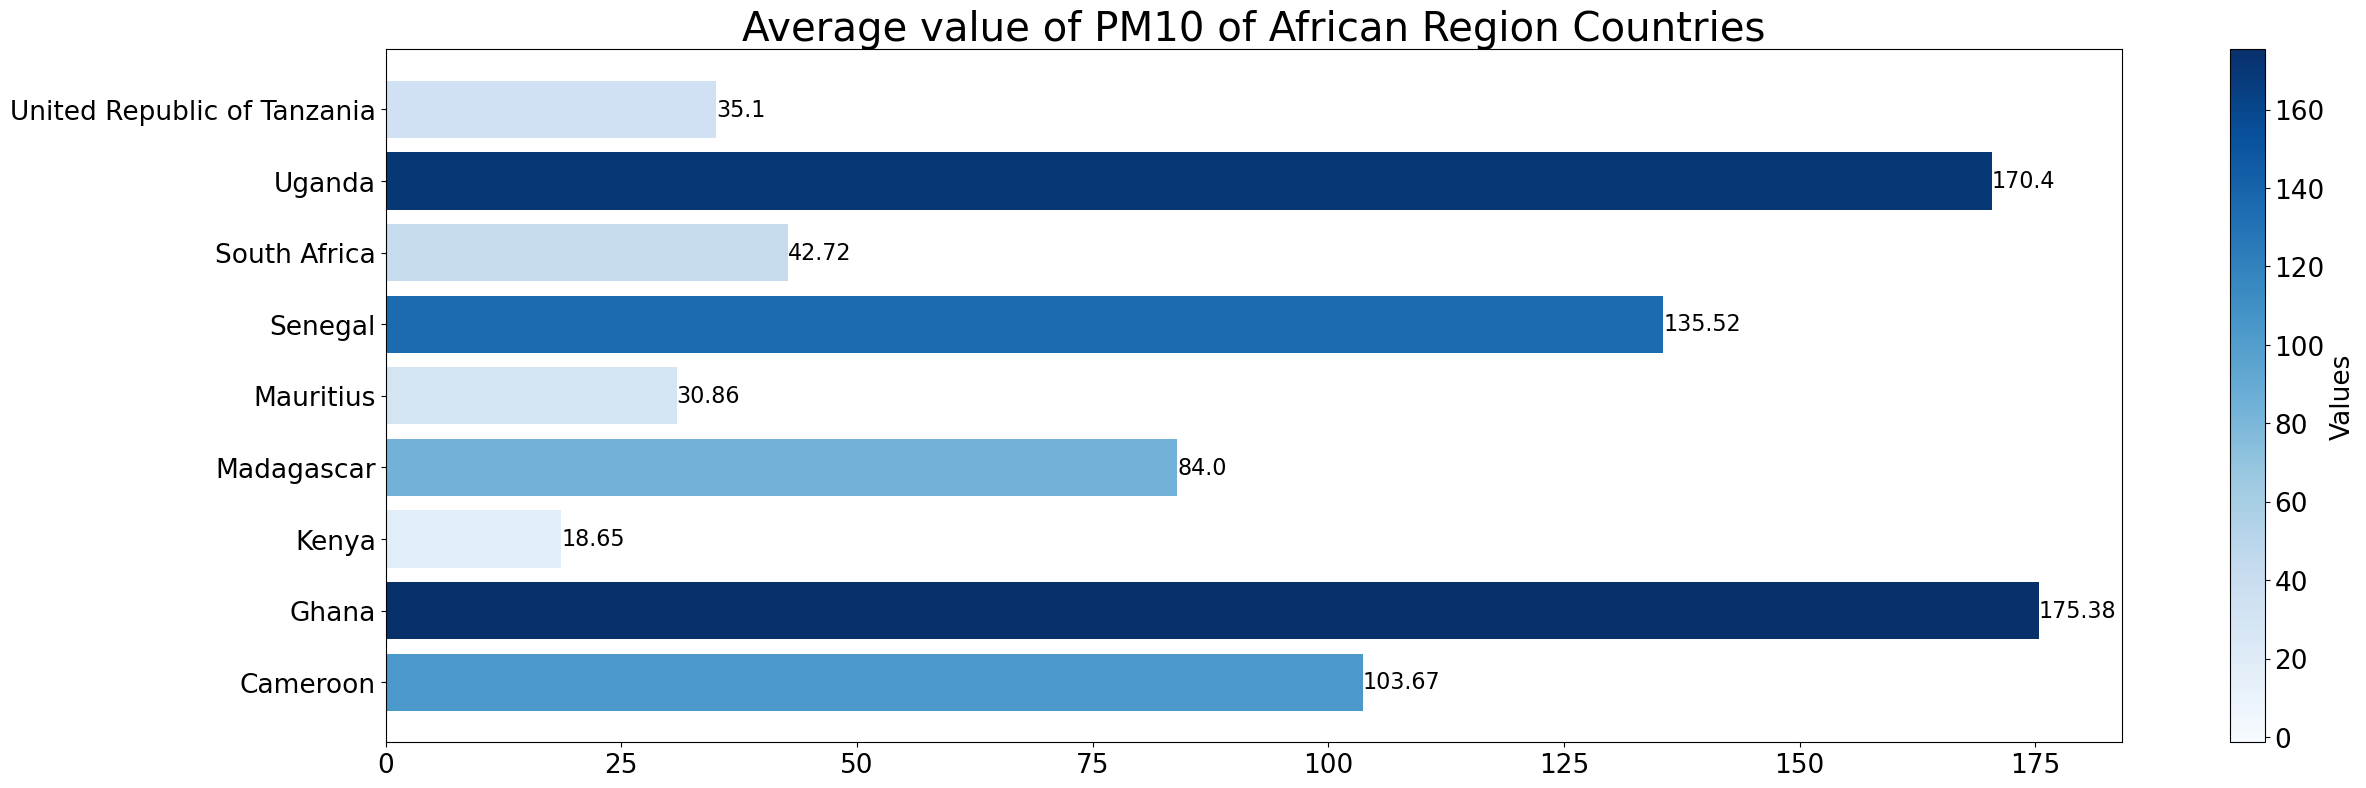

In [41]:
plot_bar(arr_african_pm10,'African Region','PM10',(28,9))

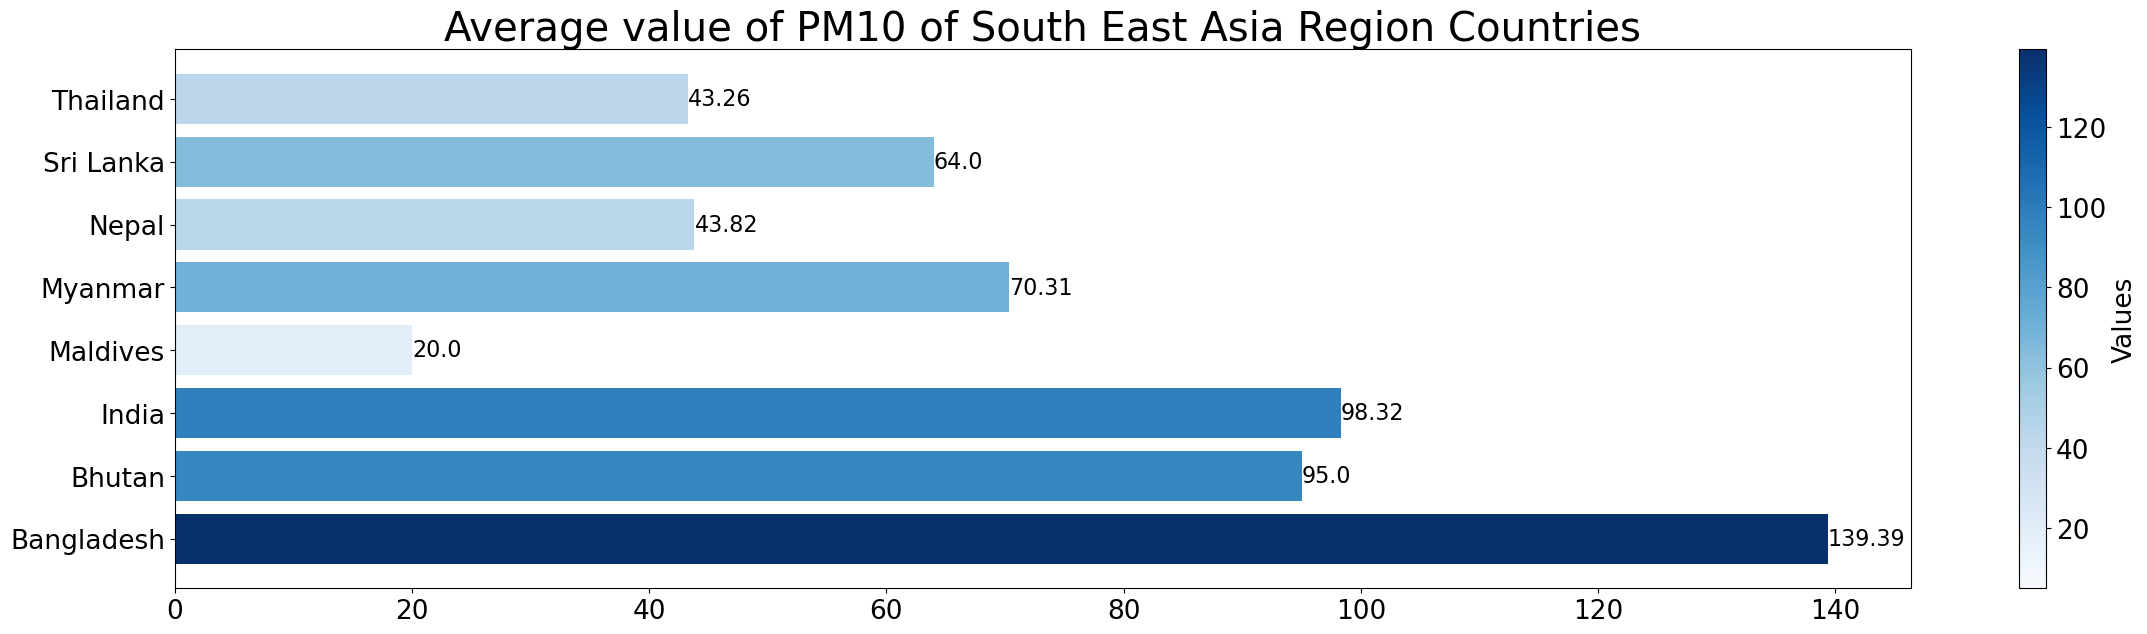

In [42]:
plot_bar(arr_se_asia_pm10,'South East Asia Region','PM10',(28,7),15)

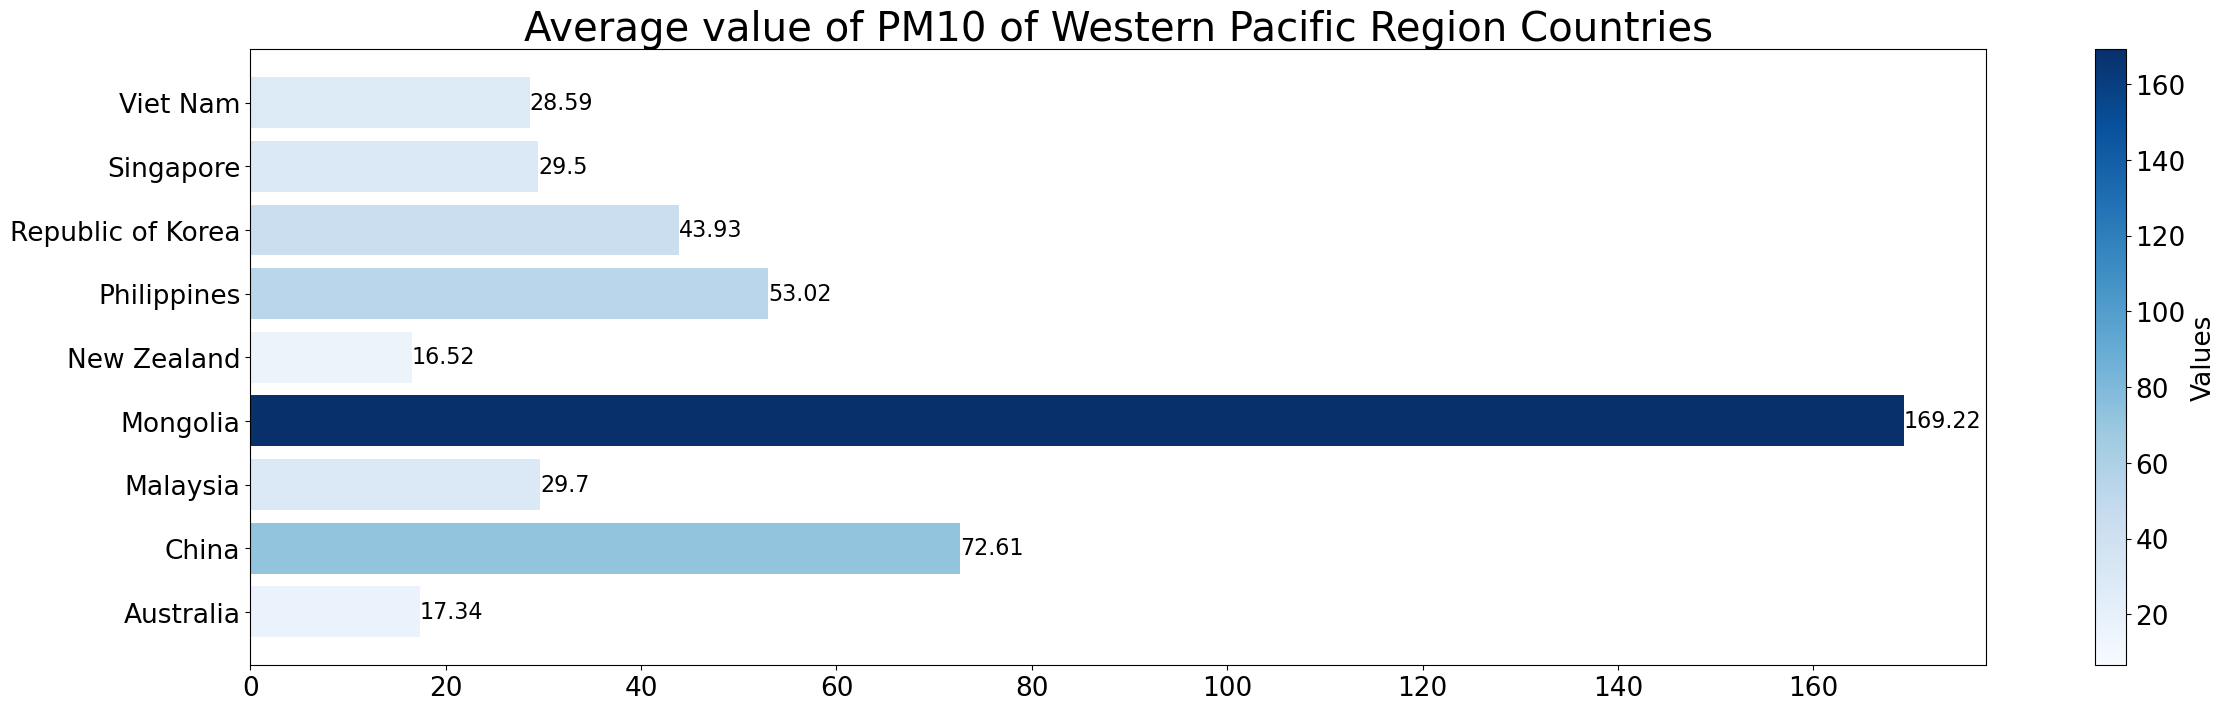

In [43]:
plot_bar(arr_pacific_pm10,'Western Pacific Region','PM10',(28,8),10)

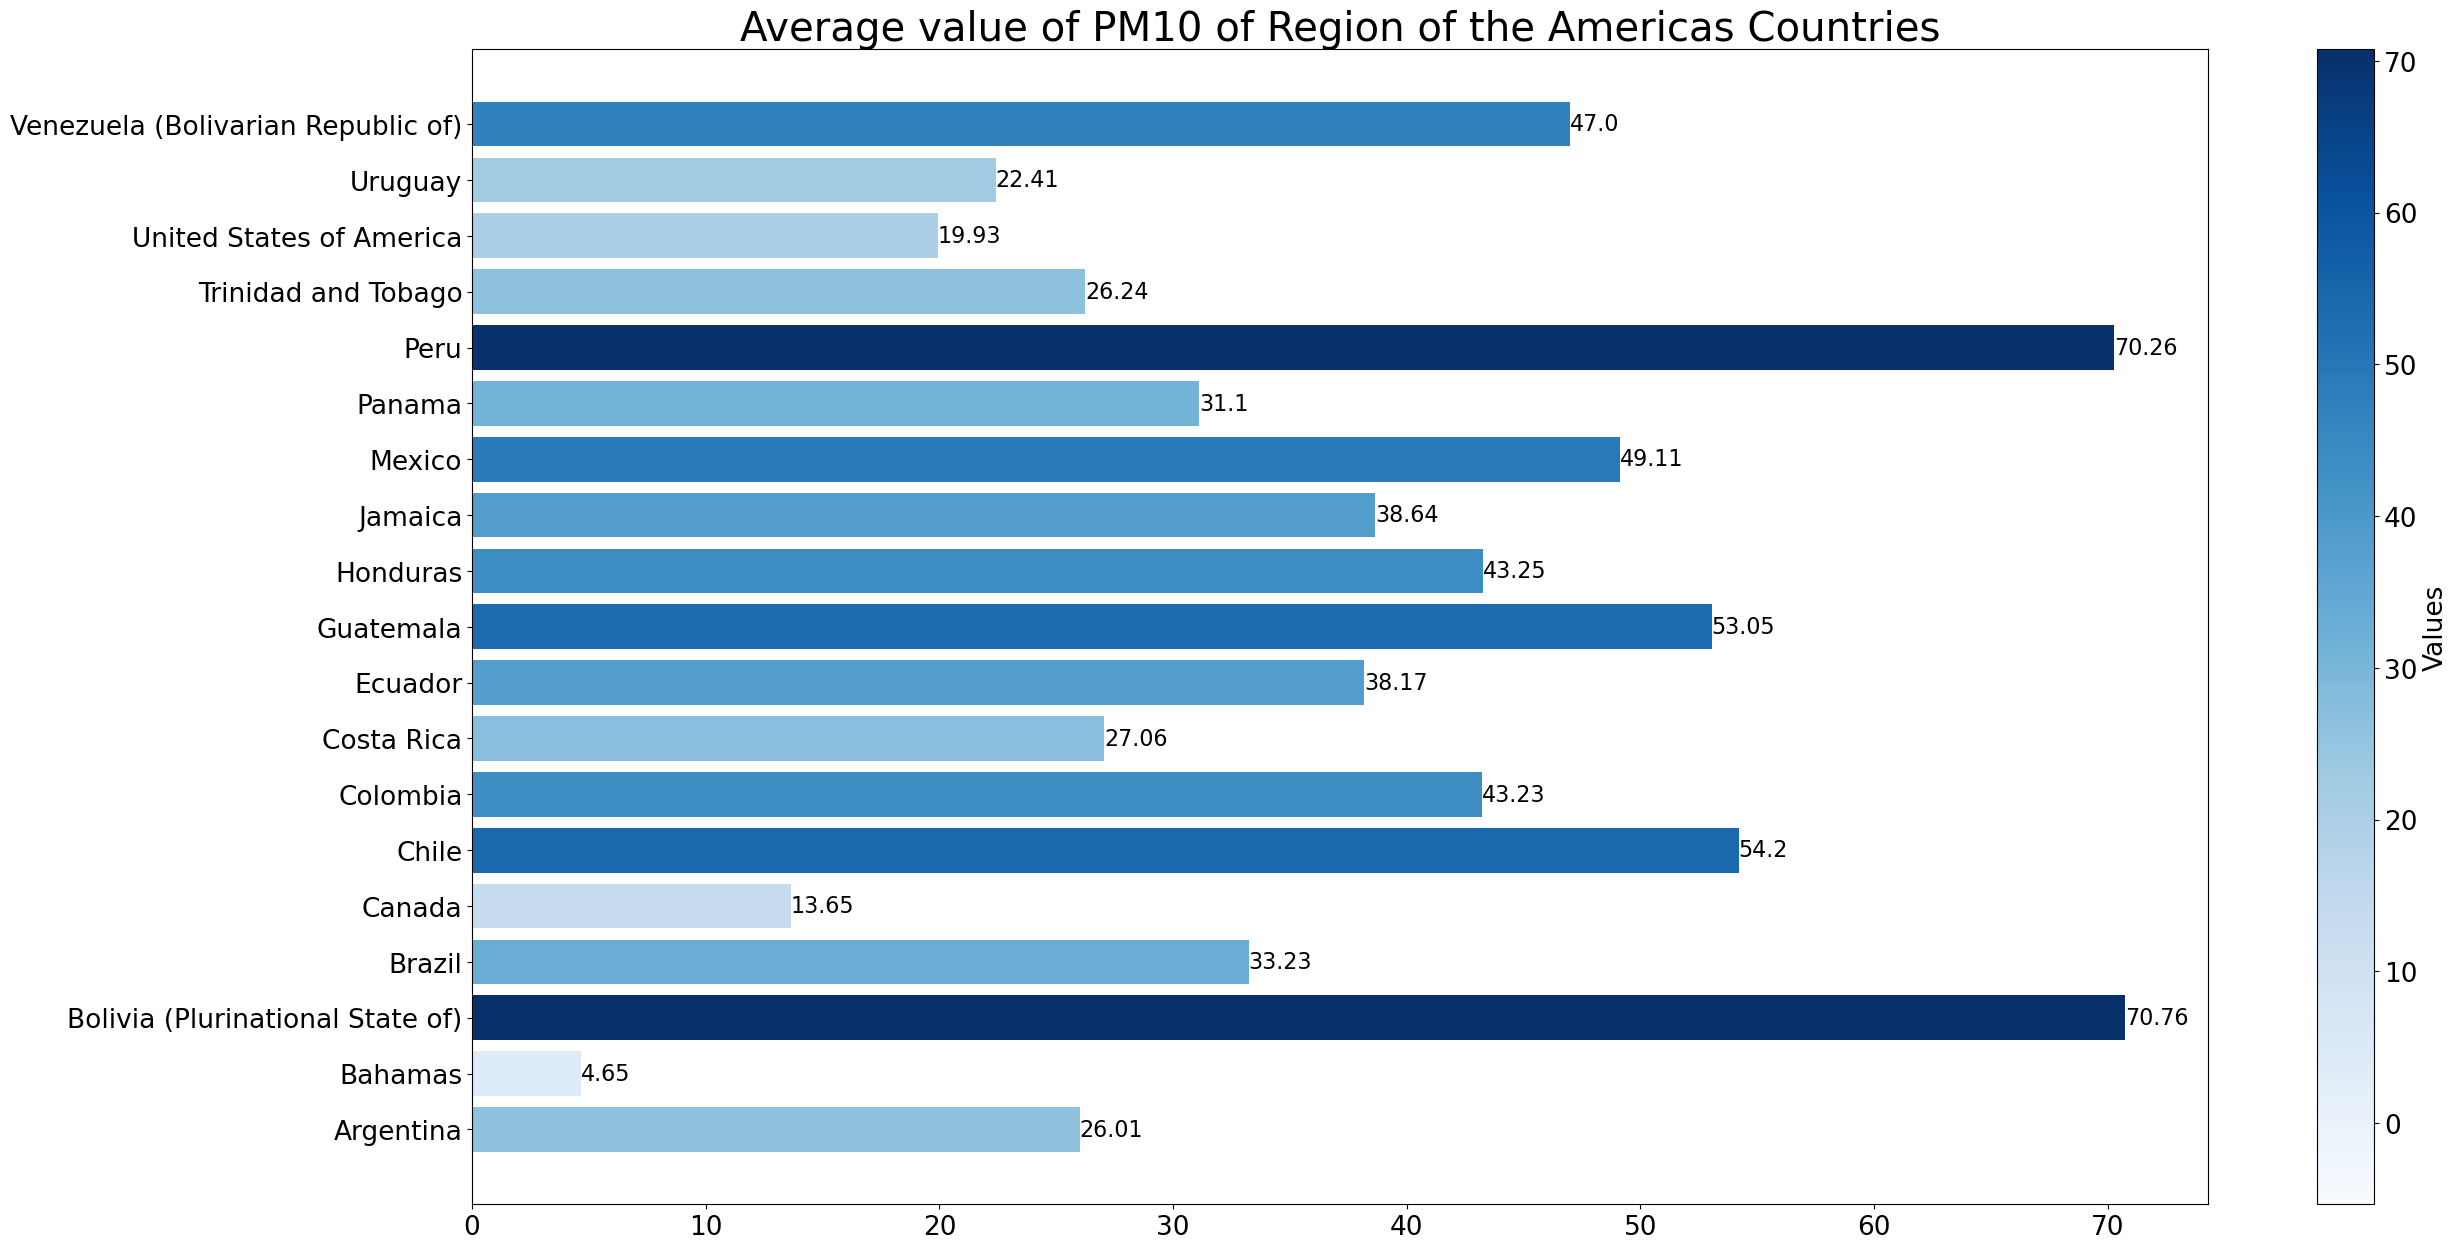

In [44]:
plot_bar(arr_america_pm10,'Region of the Americas','PM10',(28,15),10)

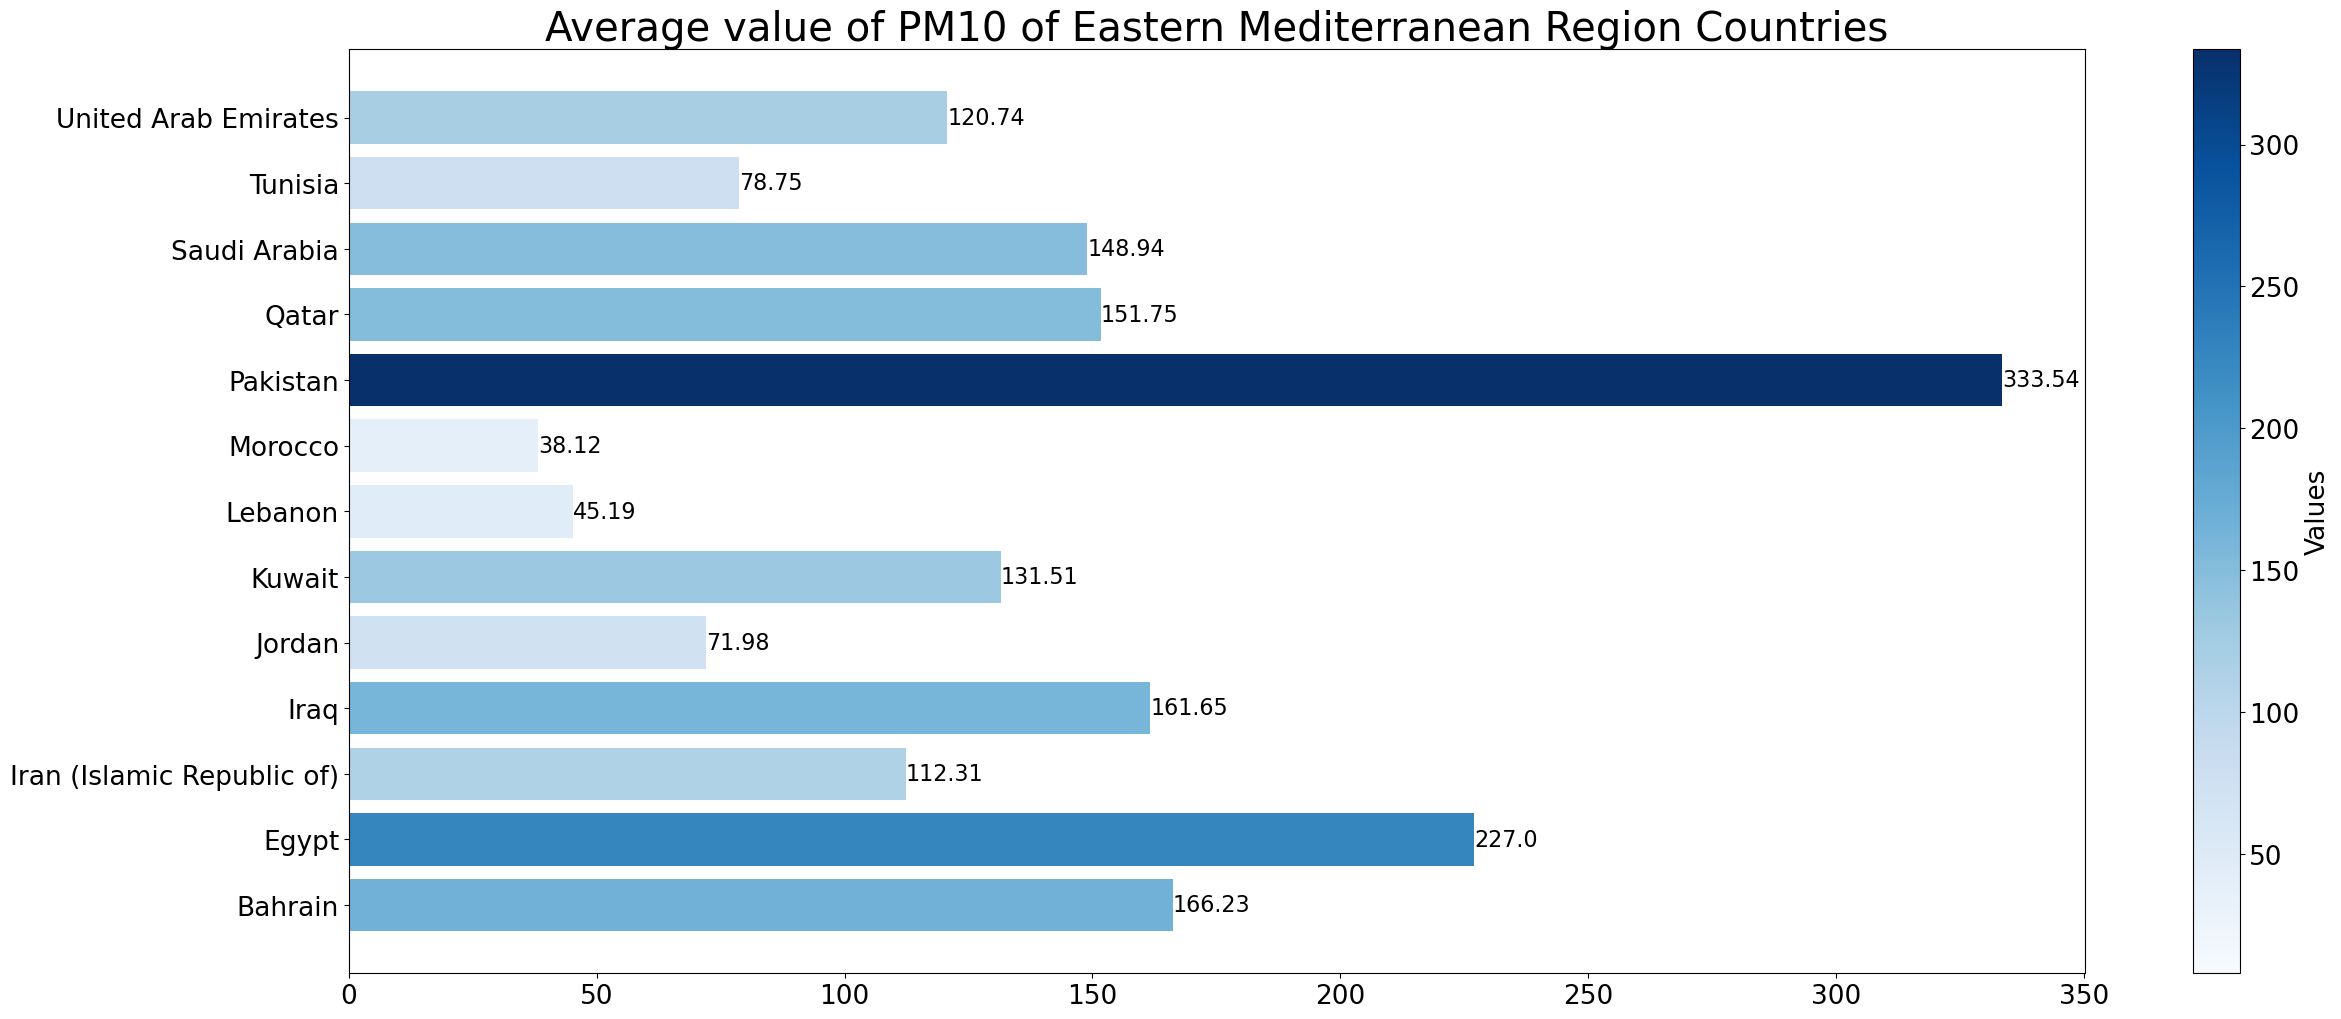

In [45]:
plot_bar(arr_east_pm10,'Eastern Mediterranean Region','PM10',(28,12),30)

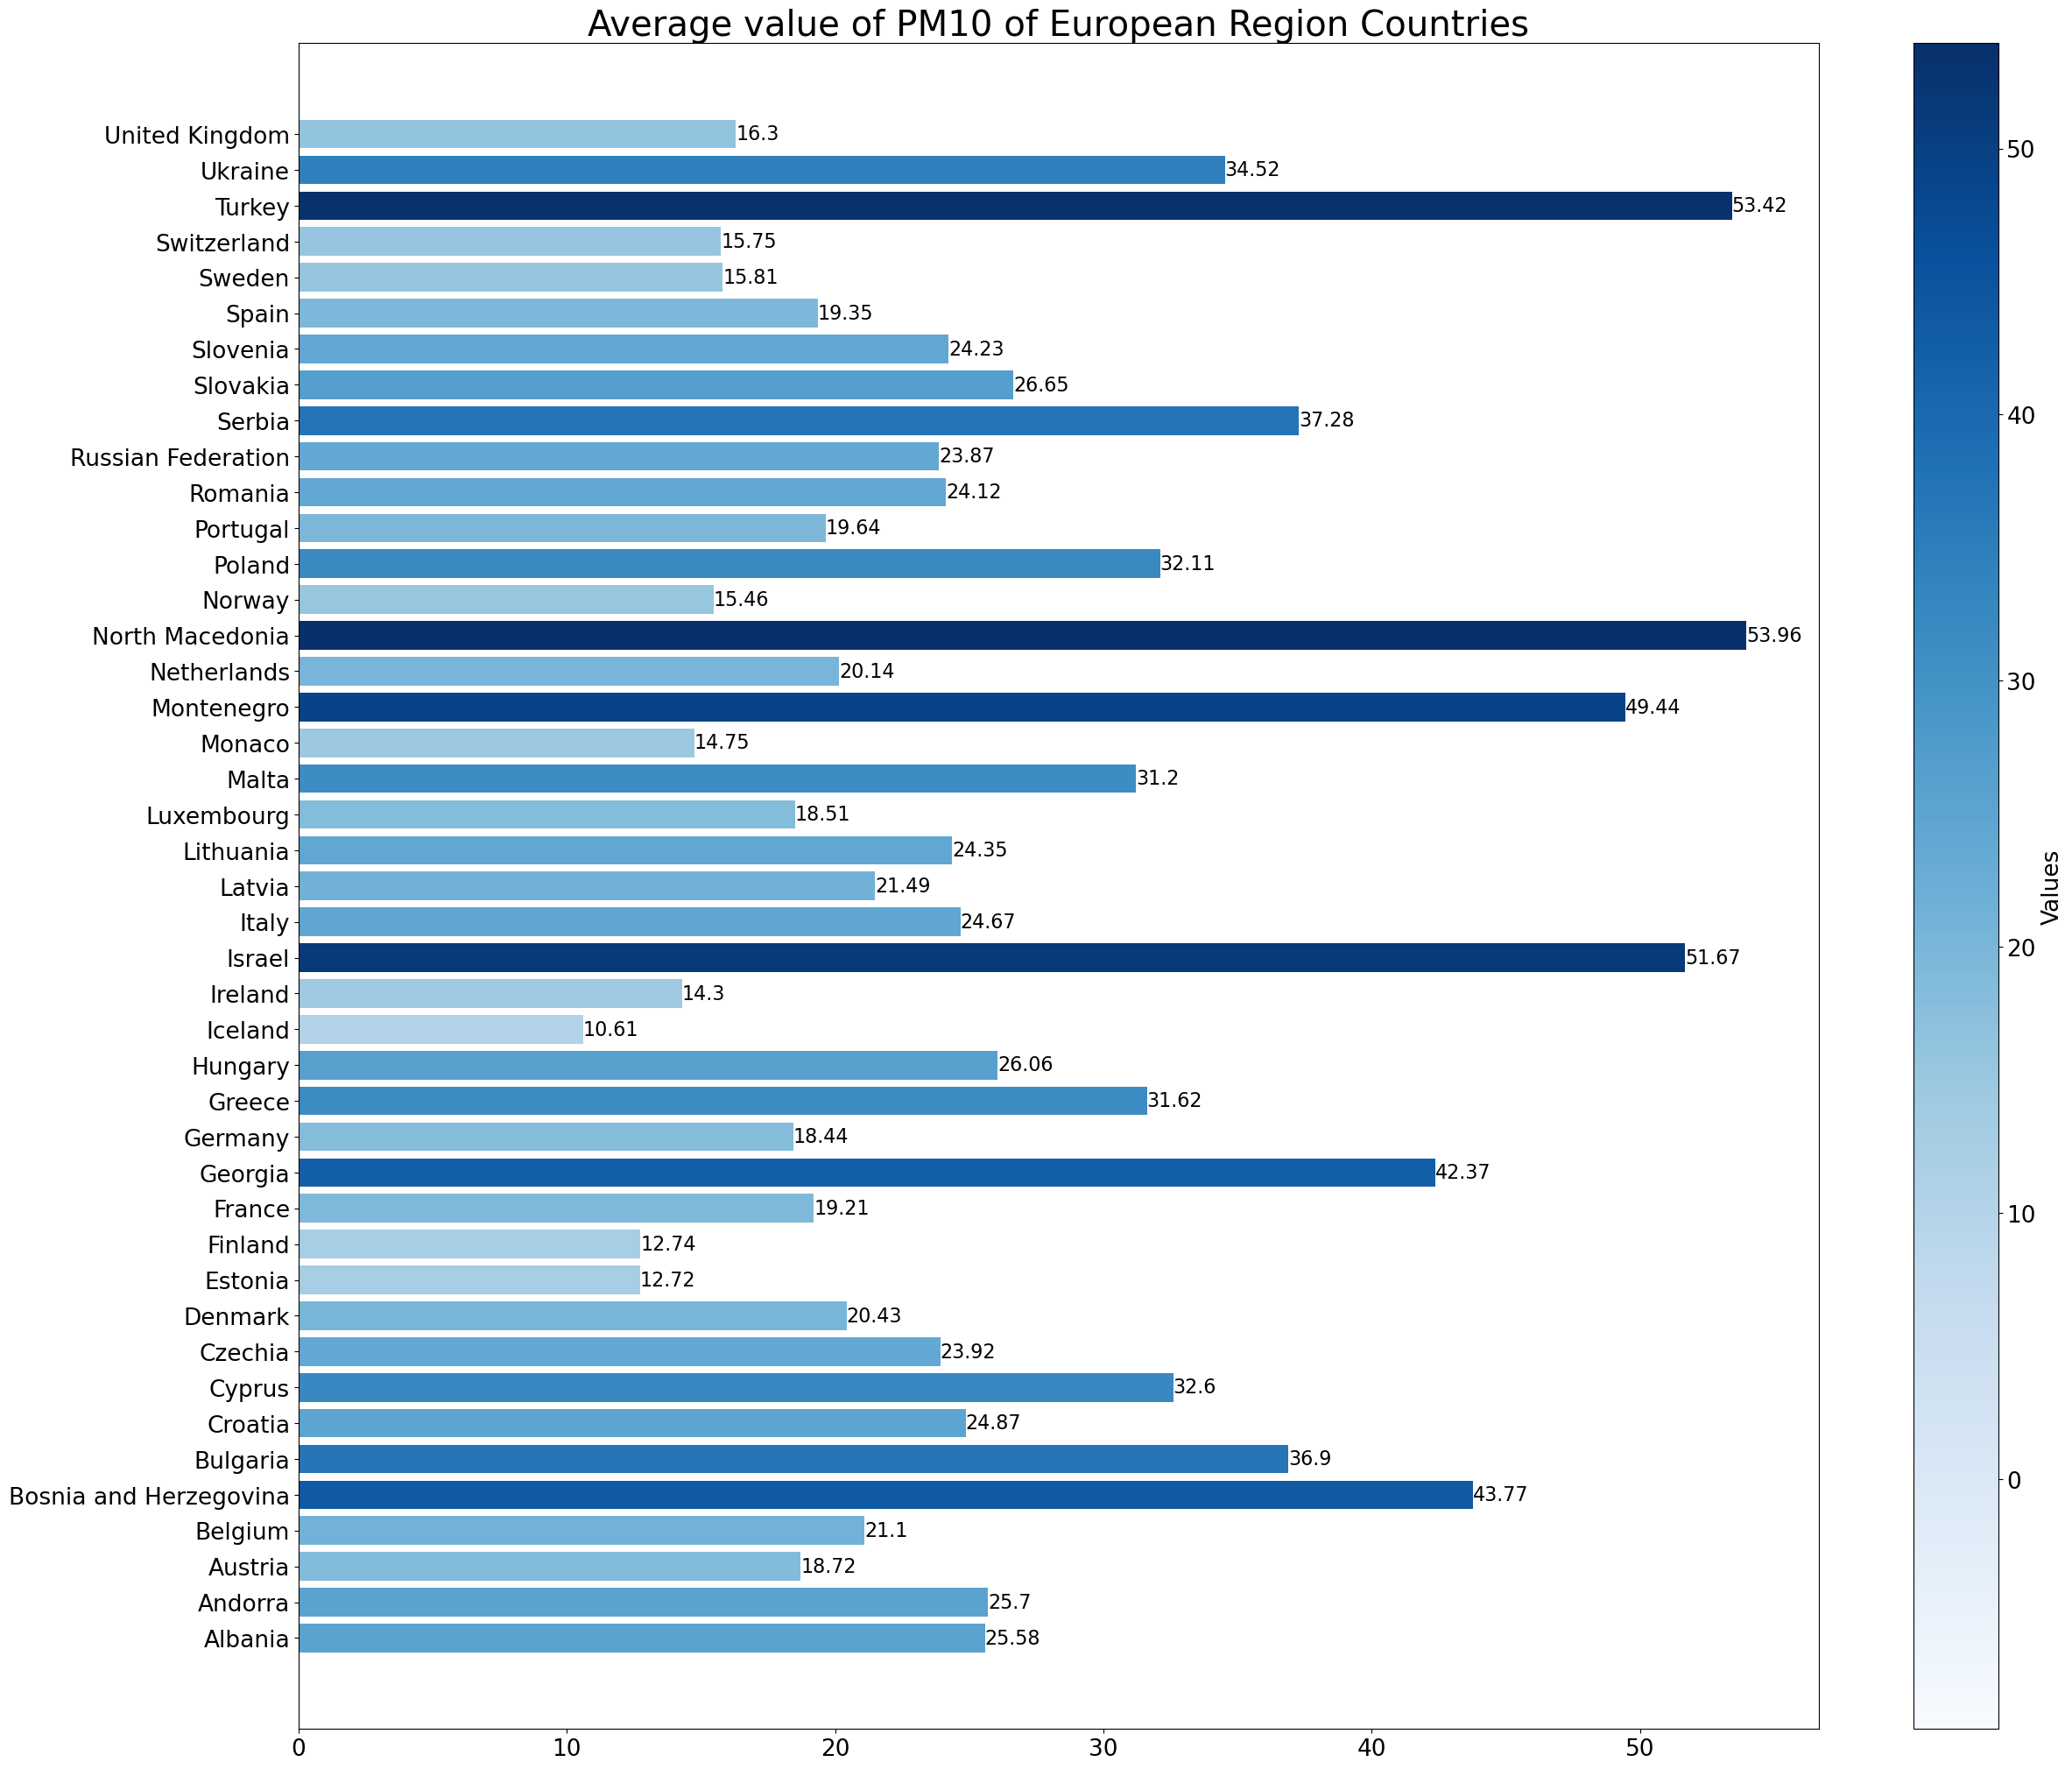

In [46]:
plot_bar(arr_europe_pm10,'European Region','PM10',(28,25),20)

#### Bar Plot for NO2

In [47]:
def plot_bar_NO(array,region,NO,figsize=(28,8),minimum_val=20):
    '''This function plots the bar plot of the countries of the given region with PM10 or PM2.5 values'''
    
    import warnings
    warnings.filterwarnings("ignore")
    
    plt.figure(figsize=figsize)

    countries=array.groupby('country').mean().index
    countries_pm=array.groupby('country').mean().iloc[:, 0].values
    countries_pm=[round(pm,2) for pm in countries_pm] # rounding the values

    norm = Normalize(vmin=min(countries_pm)-minimum_val, vmax=max(countries_pm))
    colors = plt.cm.BuGn(norm(countries_pm))

    plt.barh(countries, countries_pm, color=colors)

    for country, pm in zip(countries, countries_pm):
        plt.text(pm, country, str(pm), va='center',fontsize=16)

    plt.xticks(fontsize=19)  
    plt.yticks(fontsize=19)

    # Add a color bar to show the value-color mapping
    sm = plt.cm.ScalarMappable(cmap=plt.cm.BuGn, norm=norm)
    sm.set_array([])
    colorbar = plt.colorbar(sm, label='Values')

    colorbar.ax.yaxis.label.set_size(19)
    colorbar.ax.yaxis.set_tick_params(labelsize=19)

    plt.title(f"Average value of {NO} of {region} Countries",fontsize=29)
    plt.show()

In [48]:
arr_african_NO2=df_NO2[df_NO2['WHO Region']=='African Region'][['WHO Country Name','NO2 (μg/m3)']].values
arr_east_NO2=df_NO2[df_NO2['WHO Region']=='Eastern Mediterranean Region'][['WHO Country Name','NO2 (μg/m3)']].values
arr_europe_NO2=df_NO2[df_NO2['WHO Region']=='European Region'][['WHO Country Name','NO2 (μg/m3)']].values
arr_america_NO2=df_NO2[df_NO2['WHO Region']=='Region of the Americas'][['WHO Country Name','NO2 (μg/m3)']].values
arr_se_asia_NO2=df_NO2[df_NO2['WHO Region']=='South East Asia Region'][['WHO Country Name','NO2 (μg/m3)']].values
arr_west_pacific_NO2=df_NO2[df_NO2['WHO Region']=='Western Pacific Region'][['WHO Country Name','NO2 (μg/m3)']].values

In [49]:
arr_african_NO2=pd.DataFrame(arr_african_NO2,columns=['country','NO2'])
arr_east_NO2=pd.DataFrame(arr_east_NO2,columns=['country','NO2'])
arr_europe_NO2=pd.DataFrame(arr_europe_NO2,columns=['country','NO2'])
arr_america_NO2=pd.DataFrame(arr_america_NO2,columns=['country','NO2'])
arr_se_asia_NO2=pd.DataFrame(arr_se_asia_NO2,columns=['country','NO2'])
arr_west_pacific_NO2=pd.DataFrame(arr_west_pacific_NO2,columns=['country','NO2'])

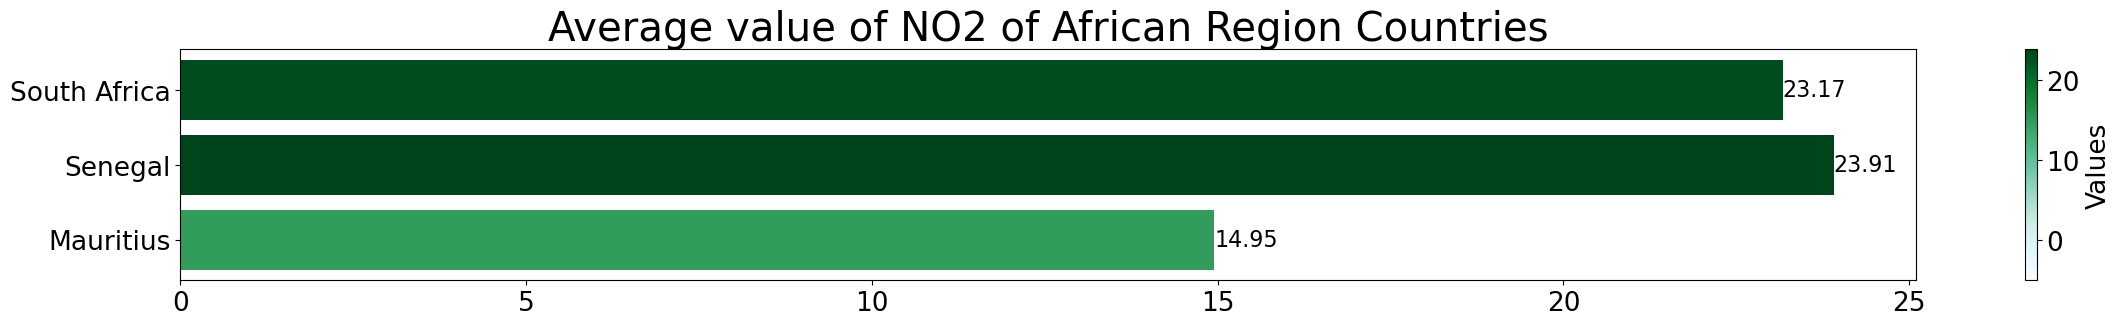

In [50]:
plot_bar_NO(arr_african_NO2,'African Region','NO2',(28,3))

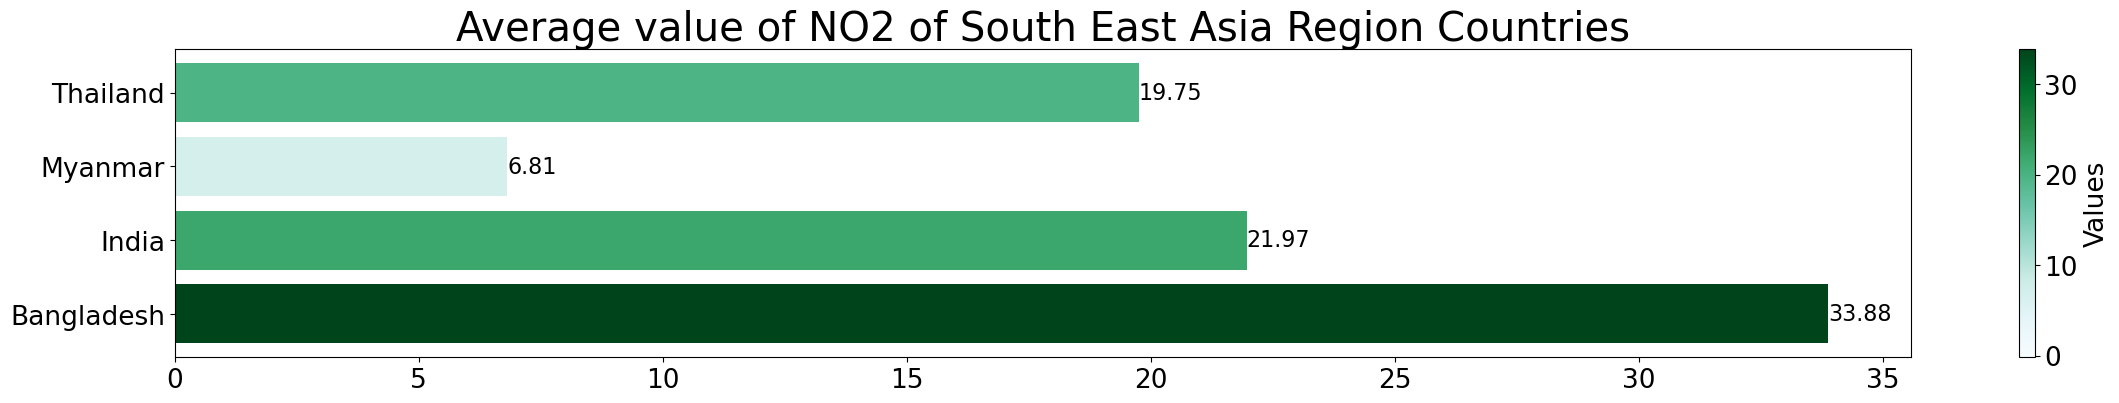

In [51]:
plot_bar_NO(arr_se_asia_NO2,'South East Asia Region','NO2',(28,4),7)

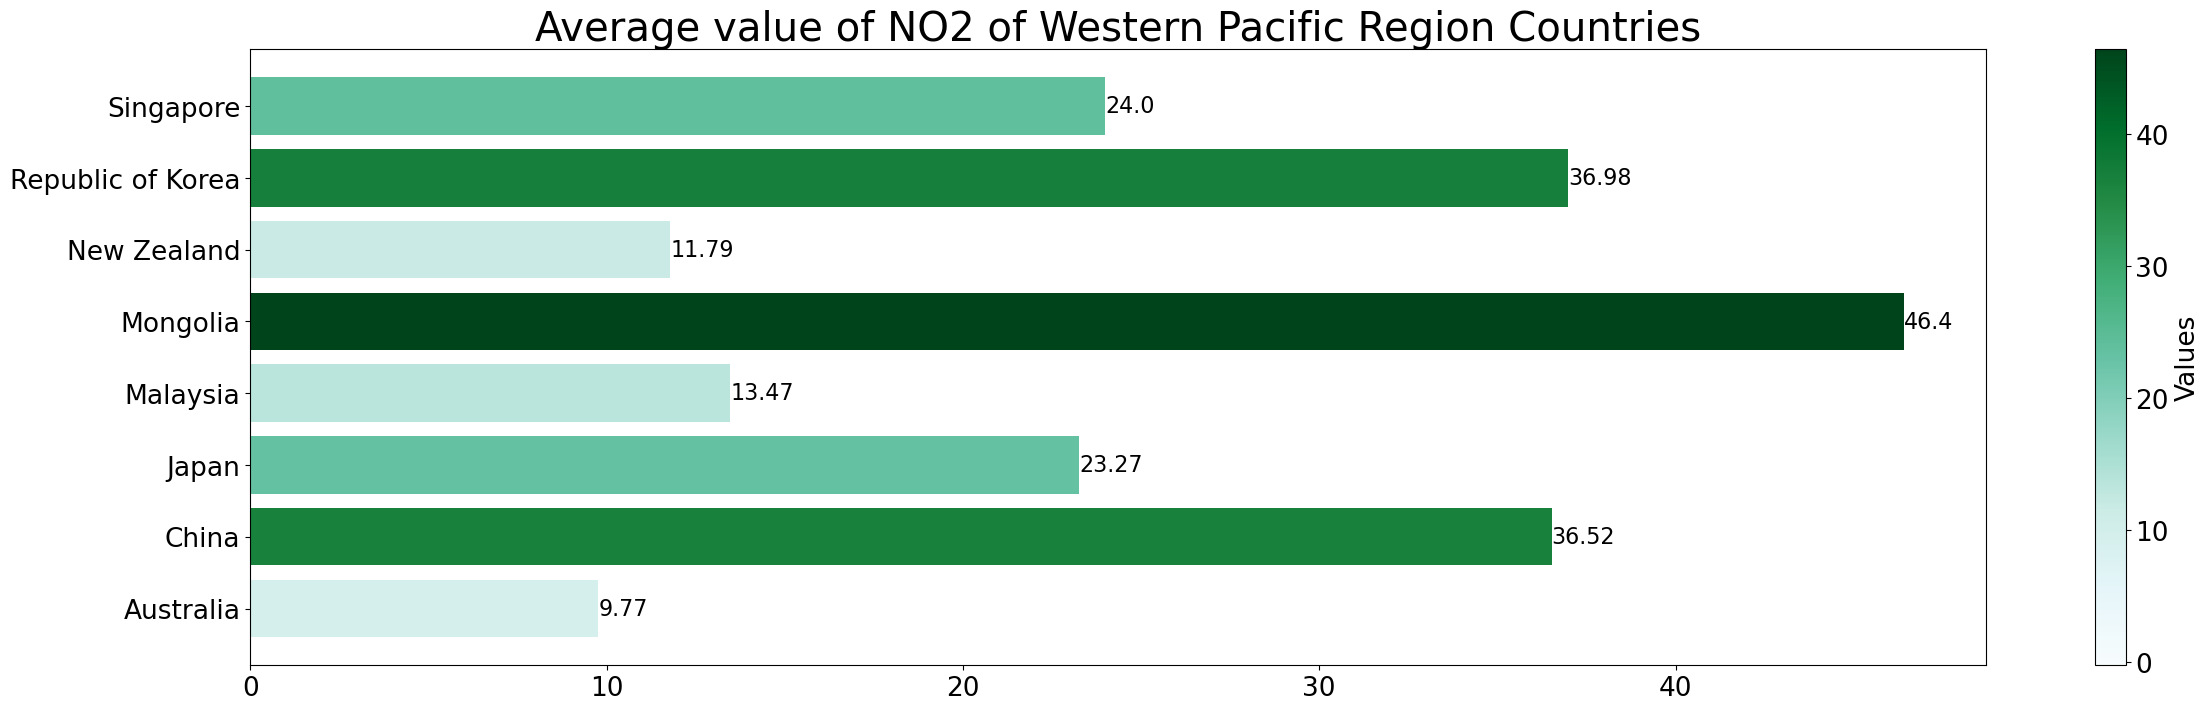

In [52]:
plot_bar_NO(arr_west_pacific_NO2,'Western Pacific Region','NO2',(28,8),10)

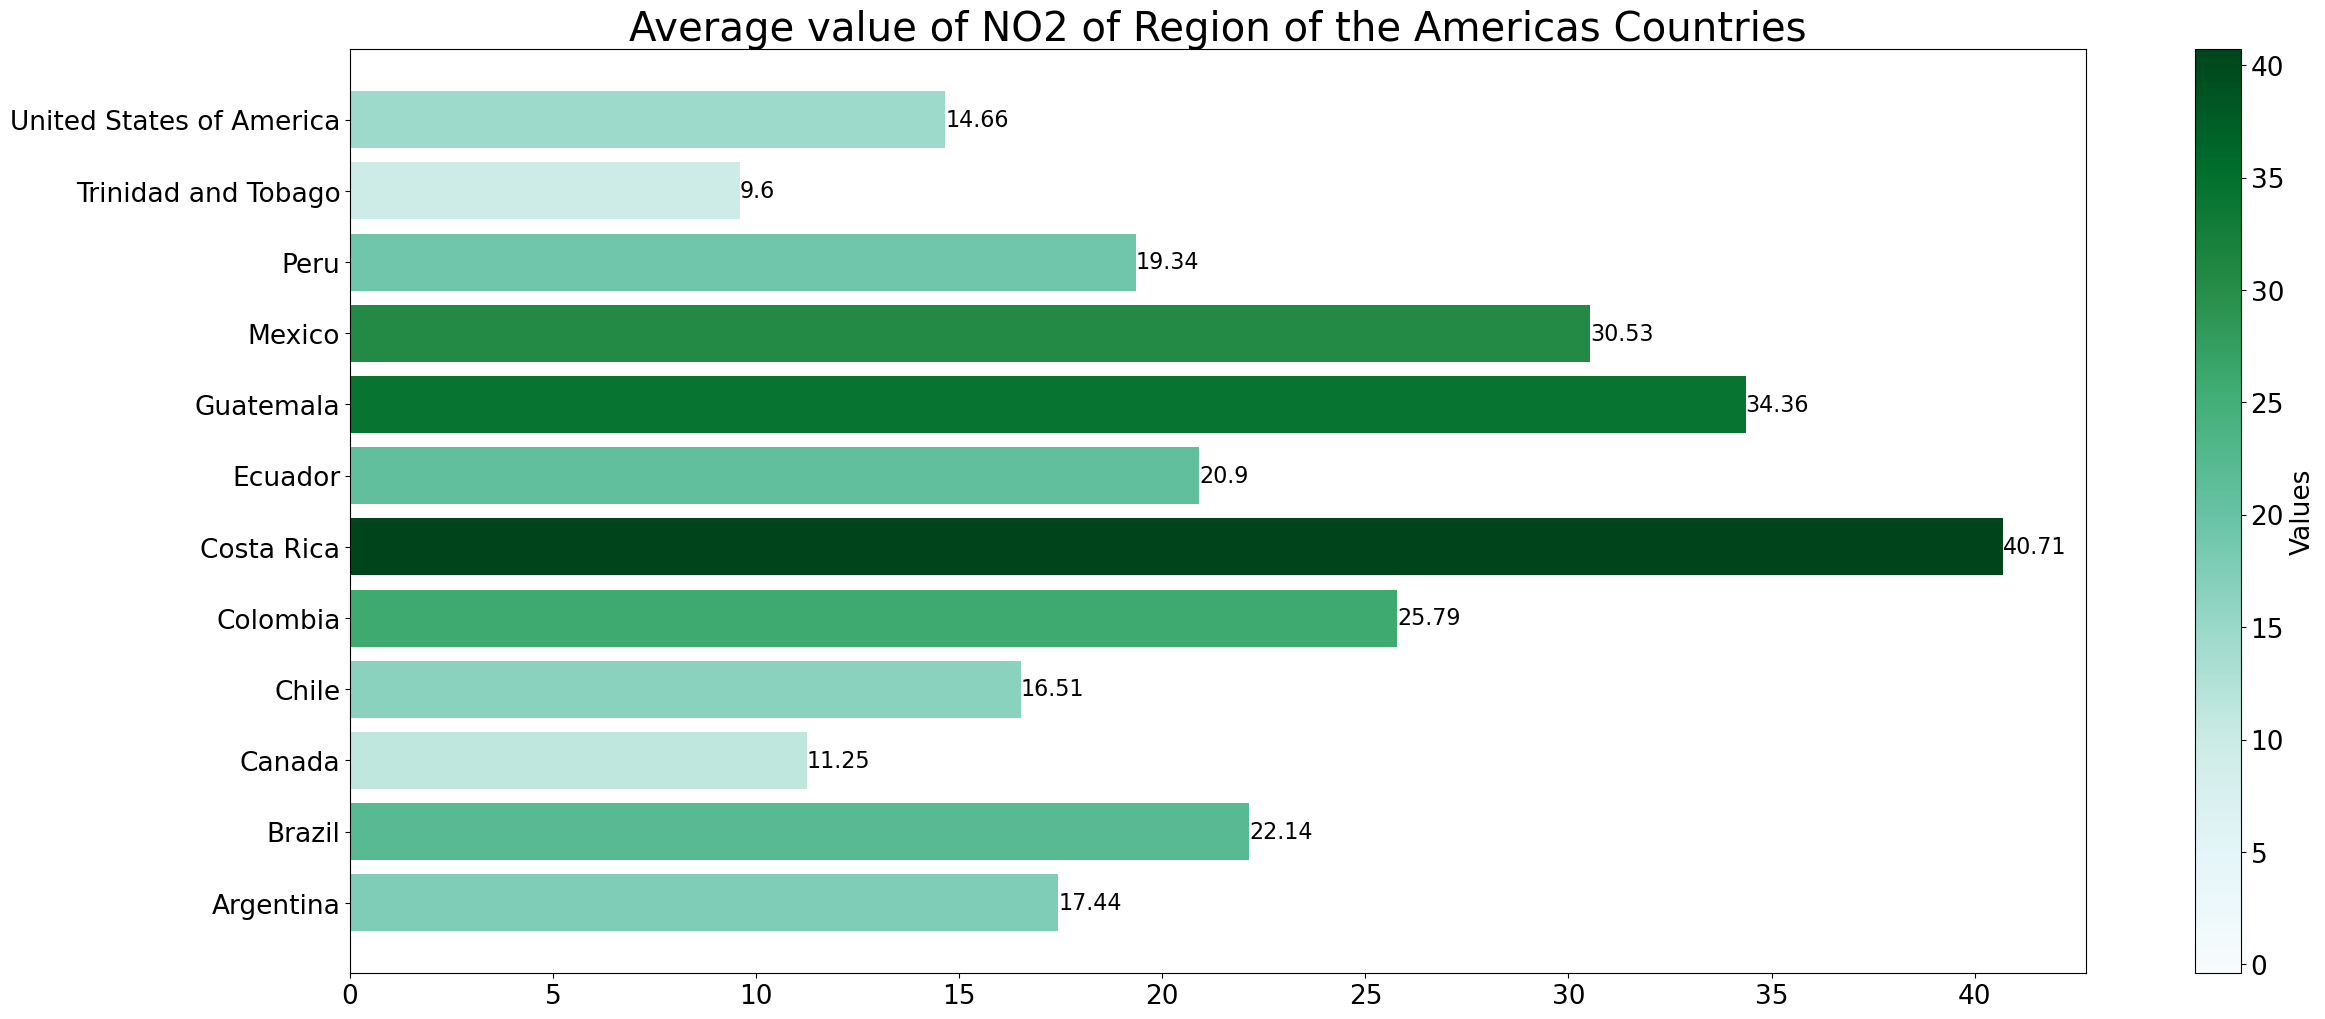

In [53]:
plot_bar_NO(arr_america_NO2,'Region of the Americas','NO2',(28,12),10)

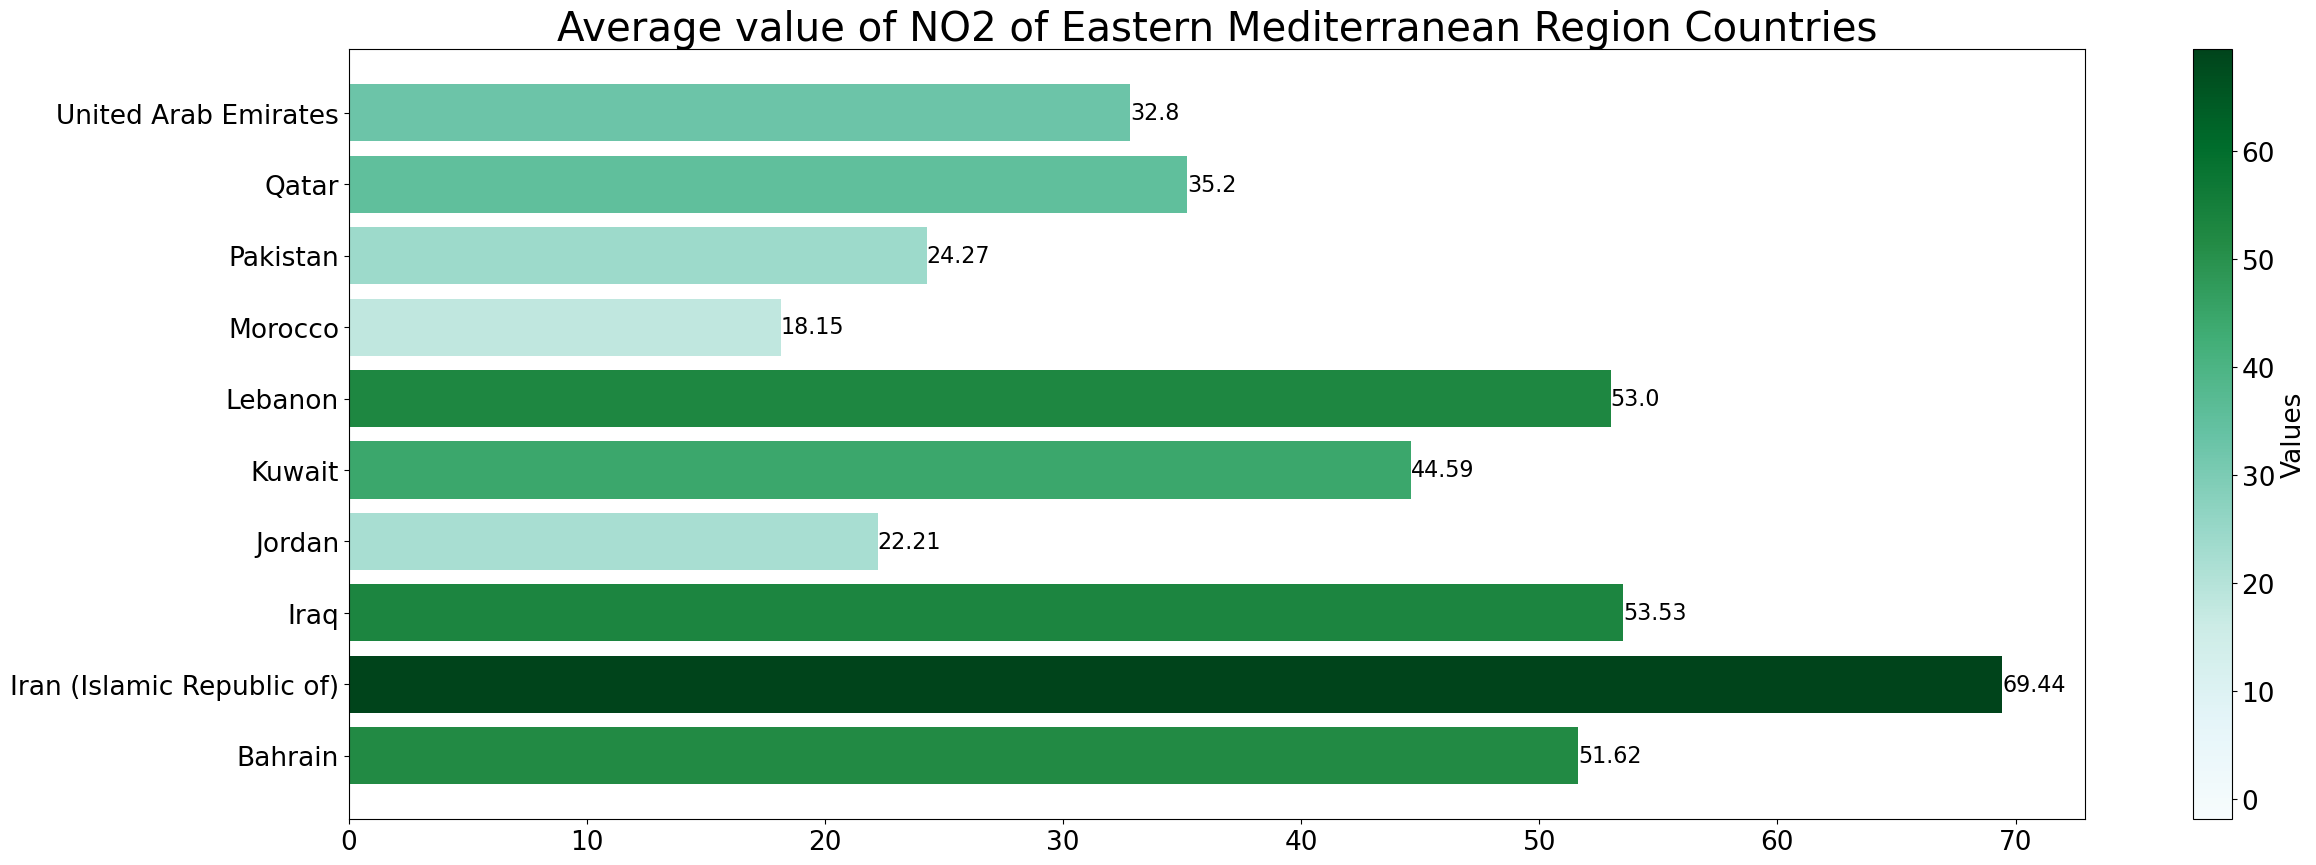

In [54]:
plot_bar_NO(arr_east_NO2,'Eastern Mediterranean Region','NO2',(28,10),20)

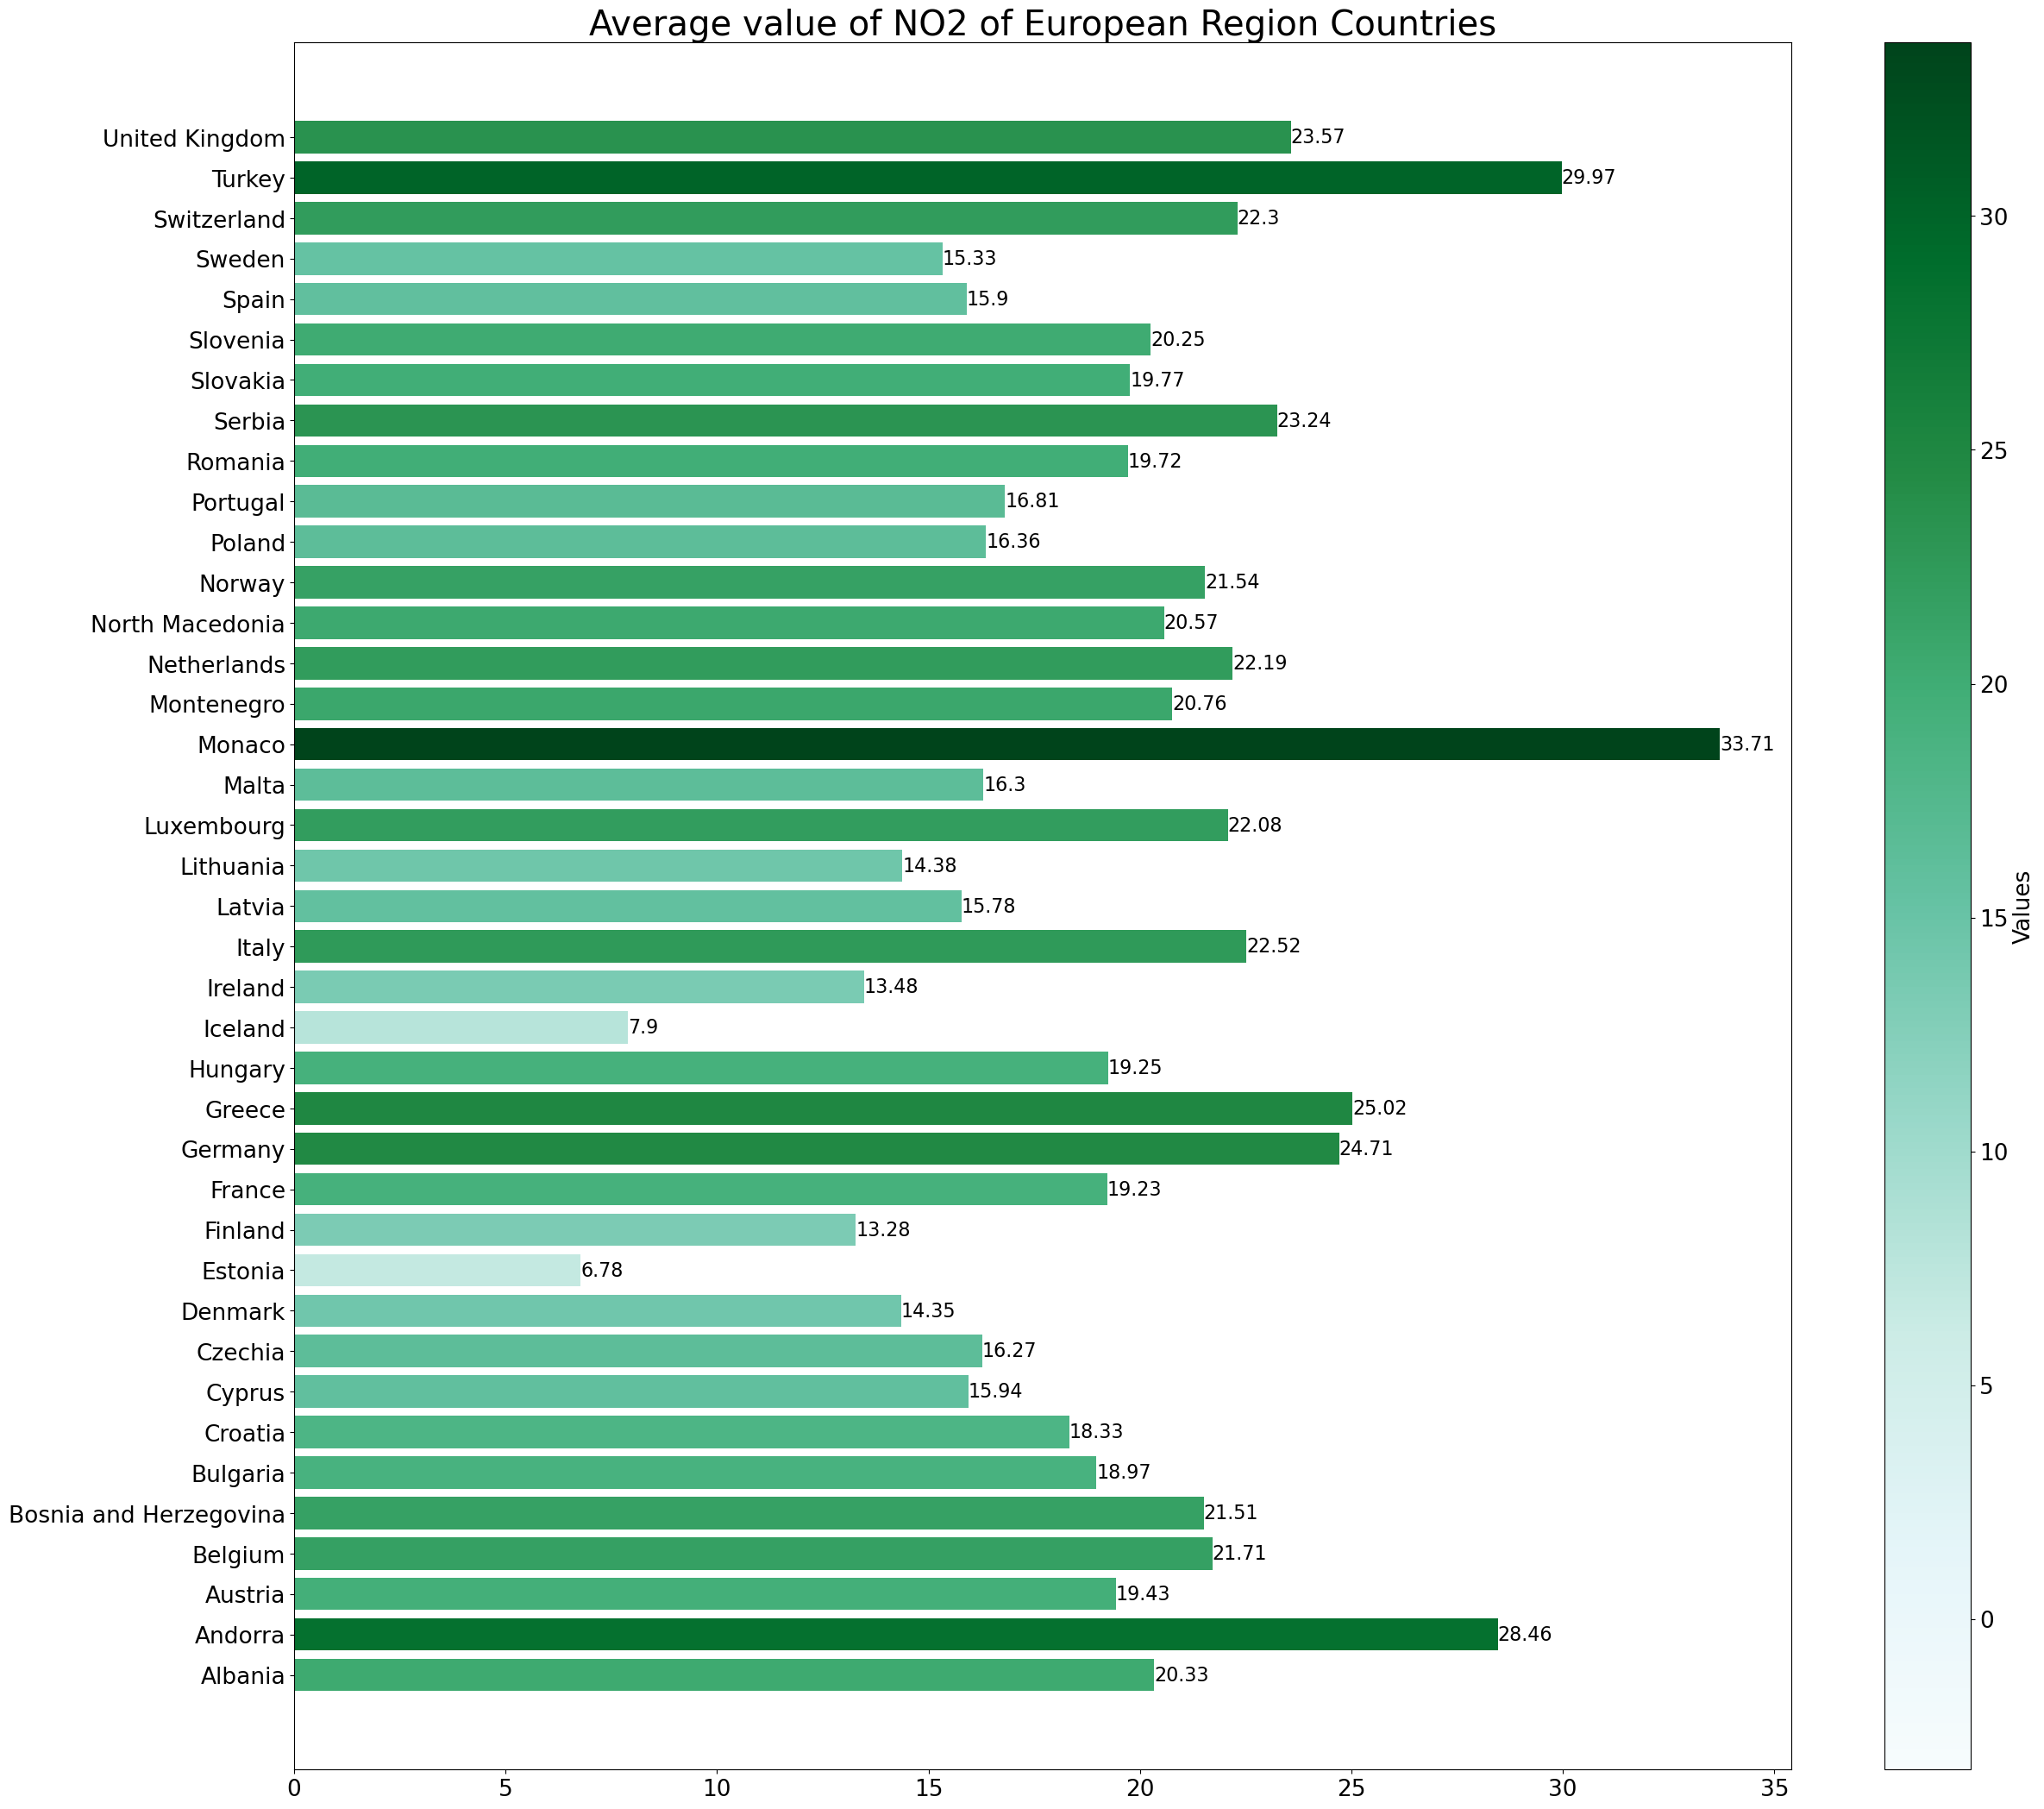

In [55]:
plot_bar_NO(arr_europe_NO2,'European Region','NO2',(28,26),10)

## Histogram plots for PM2.5, PM10, and NO2

In [52]:
## Histogram plot of average values of PM2.5, PM10, NO2 for cities

### Histogram plot for PM2.5 with cities

In [56]:
df_pm2_5_city=df_pm2_5.groupby('City or Locality')['PM2.5 (μg/m3)'].mean()

In [57]:
df_pm2_5_city=pd.DataFrame(df_pm2_5_city)

In [118]:
df_pm2_5_city


PM2.5 (μg/m3)
City or Locality               
A Coruna              14.125000
Aalborg               11.504000
Aamjiwnaang            7.000000
Aarau                 10.066667
Aarhus                10.942857
...                         ...
Çayırova              21.030000
Çorlu                 22.035000
Üskudar               17.270000
Šumperk               14.990000
Živinice              61.280000

[4029 rows x 1 columns]

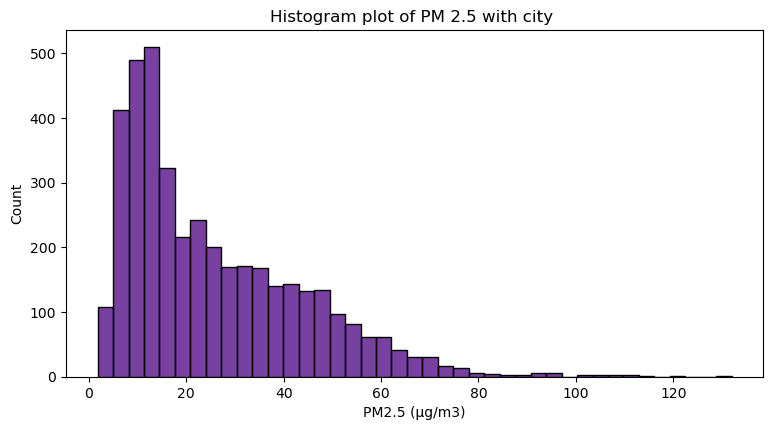

In [60]:
plt.figure(figsize=(9,4.5))
sns.histplot(
    x=df_pm2_5_city['PM2.5 (μg/m3)'],
    color='indigo'
  );
plt.title("Histogram plot of PM 2.5 with city ");


In [117]:
df_pm2_5_city[df_pm2_5_city['PM2.5 (μg/m3)']<50].count()[0]/df_pm2_5_city.count()[0]

0.8863241499131298

Observations: There are more number of cities (88.63% cities) in the world that has PM 2.5 value less than 50 μg/m3

### Histogram plot for PM10 with cities

In [61]:
df_pm10_city=df_pm10.groupby('City or Locality')['PM10 (μg/m3)'].mean()

In [62]:
df_pm10_city=pd.DataFrame(df_pm10_city)

In [63]:
df_pm10_city

PM10 (μg/m3)
City or Locality                
A Coruna               25.647143
Aachen                 20.781429
Aadorf                 13.068571
Aalen                  16.998750
Aalesund               15.530000
...                          ...
Üskudar                30.520000
İstasyon Mahallesi     54.050000
Şerefiye               40.520000
Šiauliai               21.650000
Šumperk                18.870000

[4408 rows x 1 columns]

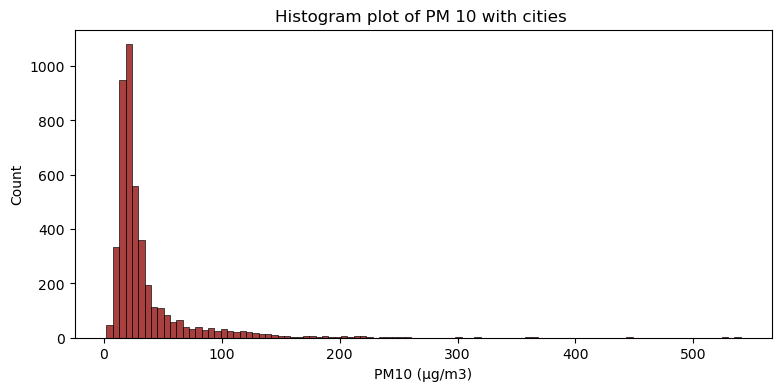

In [64]:
plt.figure(figsize=(9,4))
sns.histplot(
    x=df_pm10_city['PM10 (μg/m3)'],
    color='darkred',
    bins=100
  );
plt.title("Histogram plot of PM 10 with cities ");


In [120]:
df_pm10_city[df_pm10_city['PM10 (μg/m3)']<50].count()[0]/df_pm10_city.count()[0]

0.84505444646098

In [121]:
df_pm10_city[df_pm10_city['PM10 (μg/m3)']>300].count()[0]/df_pm10_city.count()[0]

0.0013611615245009074

Observations:
1. There are more number of cities (84.5 % cities) in the world that has PM10 value less than 50 μg/m3
2. There are few cities that has PM10 value greater than 300

#### Cities that has PM10 value greate than 300

In [65]:
df_pm10_city[df_pm10_city['PM10 (μg/m3)']>300]

PM10 (μg/m3)
City or Locality              
Al Jubail               359.00
Basra                   365.10
Hamad Town              317.88
Peshawar                540.00
Rawalpindi              448.00
Zabol                   526.50

### Histogram plot for NO2 with cities

In [66]:
df_NO2_city=df_NO2.groupby('City or Locality')['NO2 (μg/m3)'].mean()

In [67]:
df_NO2_city=pd.DataFrame(df_NO2_city)

In [68]:
df_NO2_city

NO2 (μg/m3)
City or Locality             
A Coruna            21.651429
Aachen              36.453750
Aadorf              12.450000
Aalborg             15.030000
Aalen               21.748571
...                       ...
Şerefiye            49.015000
Šiauliai            21.006667
Šumperk             17.530000
Ţeţchea             16.395000
Žacleř              13.660000

[4393 rows x 1 columns]

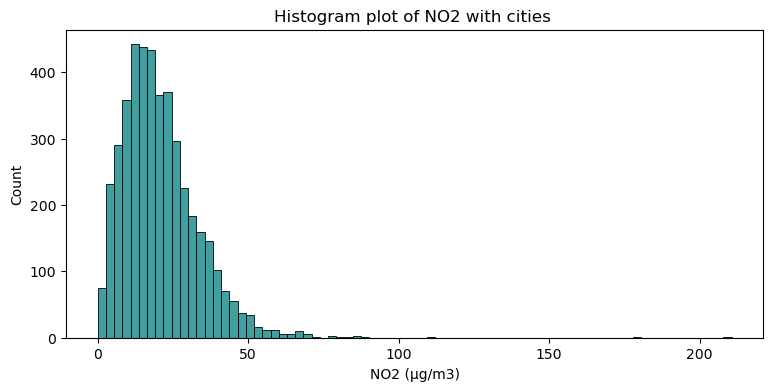

In [69]:
plt.figure(figsize=(9,4))
sns.histplot(
    x=df_NO2_city['NO2 (μg/m3)'],
    color='teal',
    bins=77
  );
plt.title("Histogram plot of NO2 with cities ");


Observation: Almost all the cities has its NO2 level less than 50 μg/m3

In [70]:
df.columns

Index(['WHO Region', 'ISO3', 'WHO Country Name', 'City or Locality',
       'Measurement Year', 'PM2.5 (μg/m3)', 'PM10 (μg/m3)', 'NO2 (μg/m3)',
       'PM25 temporal coverage (%)', 'PM10 temporal coverage (%)',
       'NO2 temporal coverage (%)', 'Reference',
       'Number and type of monitoring stations', 'Version of the database'],
      dtype='object')

### Bar Plot for PM2.5 with year

In [101]:
def plot_bar_year_pm2_5(ax,year): 
    sns.barplot(
        ax=ax,
        x=df_pm2_5[df_pm2_5['Measurement Year']==year].groupby('WHO Region')['PM2.5 (μg/m3)'].mean().index, 
        y=df_pm2_5[df_pm2_5['Measurement Year']==year].groupby('WHO Region')['PM2.5 (μg/m3)'].mean().values, 
        hue=df_pm2_5[df_pm2_5['Measurement Year']==year].groupby('WHO Region')['PM2.5 (μg/m3)'].mean().index, 
        ci=None, 
        orient='vertical', 
        palette='Set1', 
        saturation=1.7, 
        dodge=False, 
        alpha=0.9
    )
    plt.xticks([])
    # Add labels on top of the bars
    ax.set(xticklabels=[])

    ax.set_yticklabels(ax.get_yticklabels(), fontsize=22)  # Increase y-axis tick label font size
    ax.set_xlabel('WHO Region', fontsize=17)  # Increase x-axis label font size
    ax.set_ylabel('Average PM 2.5 value', fontsize=17)  # Increase y-axis label font size

    legend = ax.get_legend()
    legend.set_title("WHO Region", prop={'size': 16})  # Increase legend title font size
    for text in legend.texts:
        text.set_fontsize(15)
    
    ax.set_title(year,fontsize=17)
    for i, v in enumerate(df_pm2_5[df_pm2_5['Measurement Year']==year].groupby('WHO Region')['PM2.5 (μg/m3)'].mean().values):
        ax.text(
            i, 
            round(v), 
            str(round(v,2)), 
            color='black', 
            ha='center', 
            va='bottom',
            fontsize=22
        )


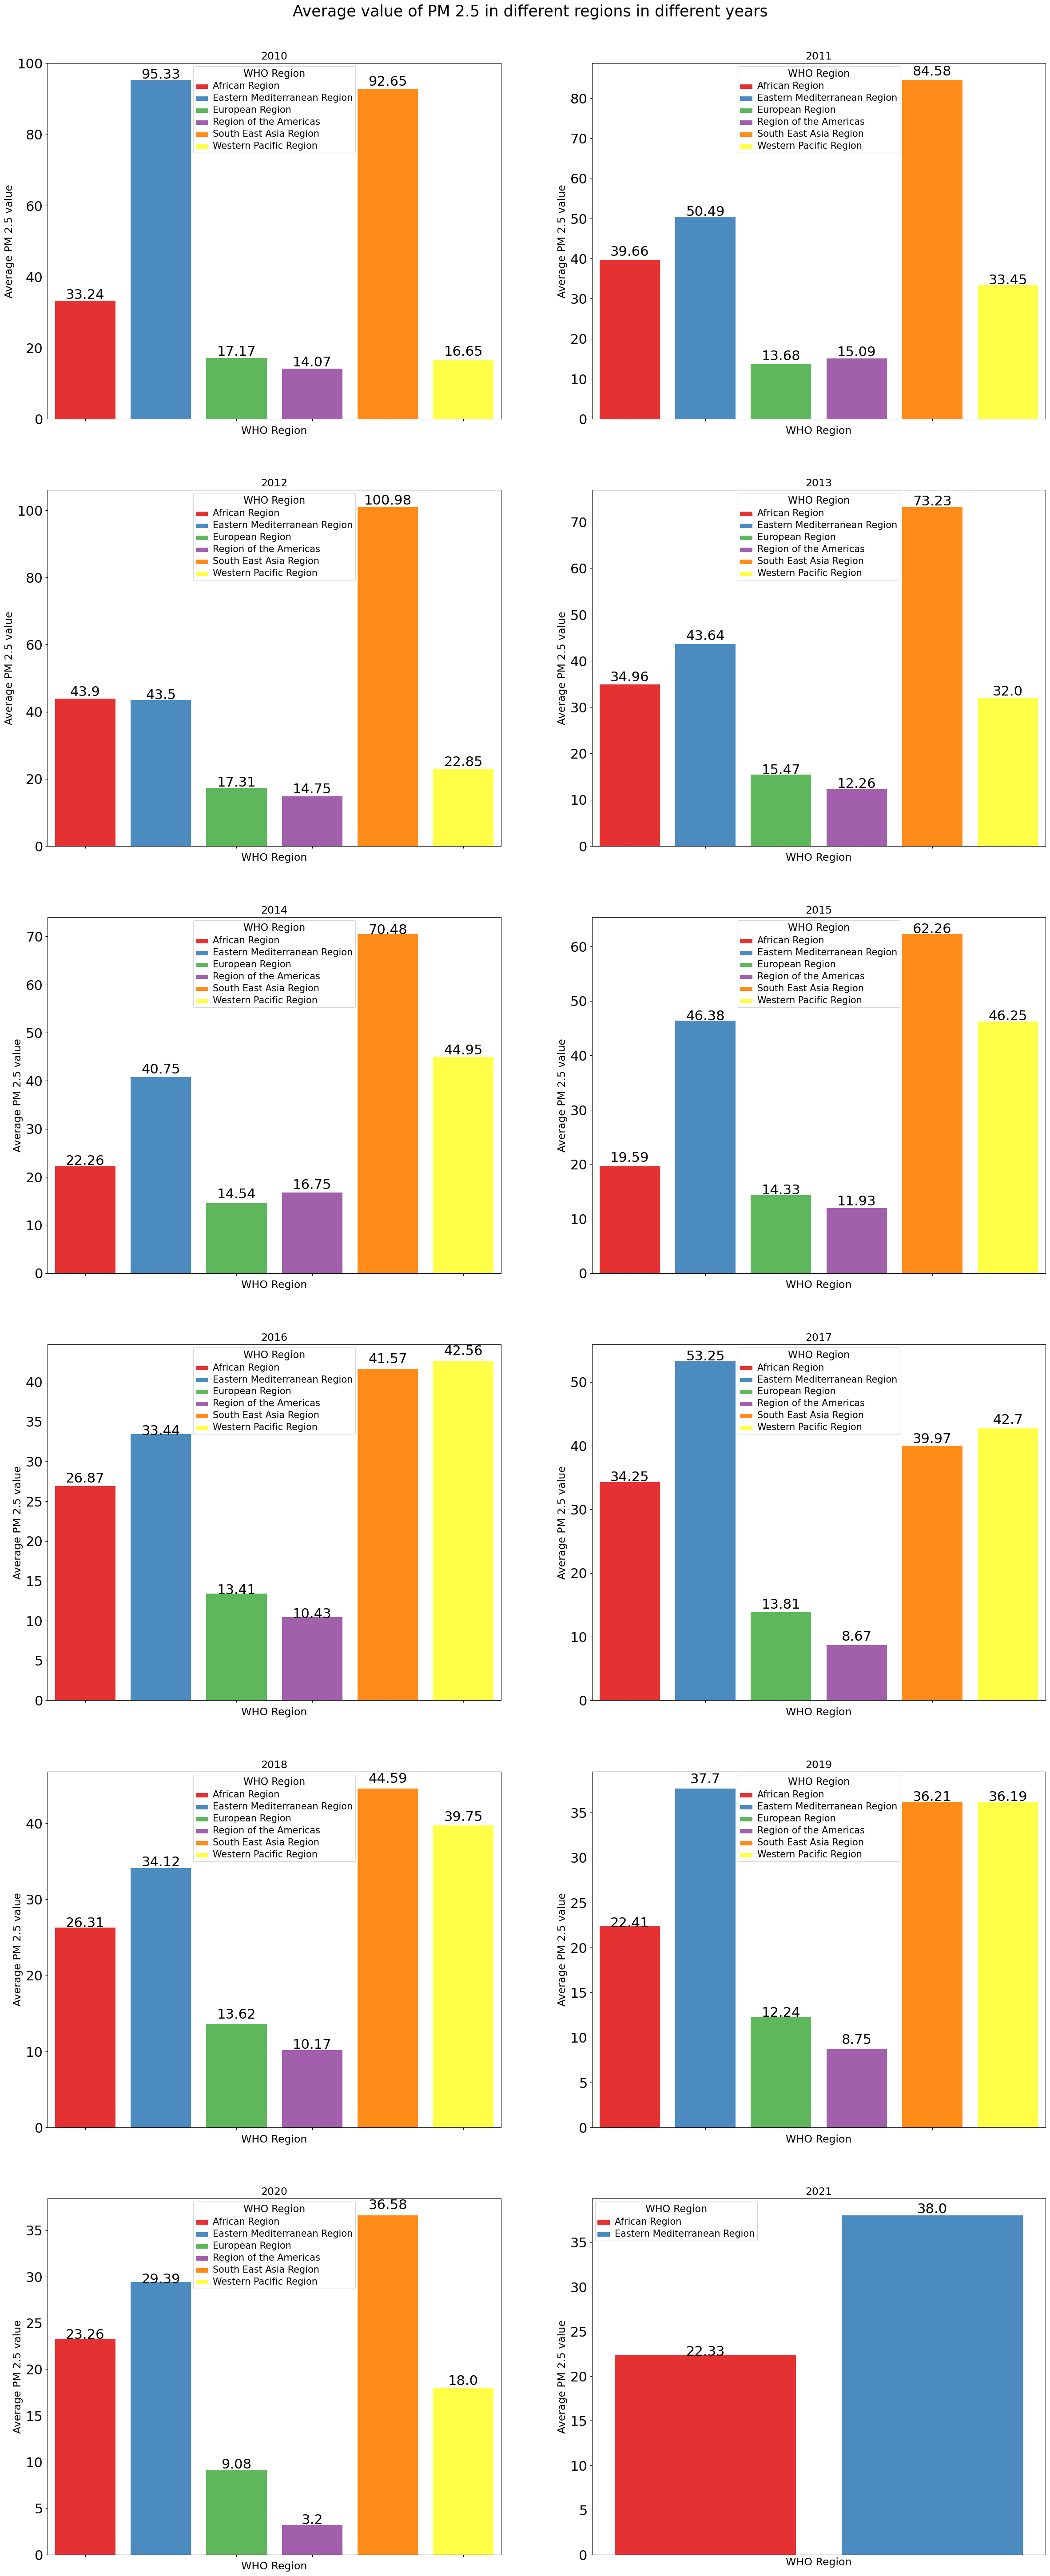

In [105]:
# fig, axes = plt.subplots(6, 2, figsize=(29, 88)) # for three figure in a page
fig, axes = plt.subplots(6, 2, figsize=(29, 66)) # for four figure in a page

# Call the function for each subplot
plot_bar_year_pm2_5(axes[0,0],2010)
plot_bar_year_pm2_5(axes[0,1], 2011)
plot_bar_year_pm2_5(axes[1, 0], 2012)
plot_bar_year_pm2_5(axes[1, 1],2013)
plot_bar_year_pm2_5(axes[2, 0], 2014)
plot_bar_year_pm2_5(axes[2, 1],2015)
plot_bar_year_pm2_5(axes[3, 0], 2016)
plot_bar_year_pm2_5(axes[3, 1],2017)
plot_bar_year_pm2_5(axes[4, 0], 2018)
plot_bar_year_pm2_5(axes[4, 1],2019)
plot_bar_year_pm2_5(axes[5, 0], 2020)
plot_bar_year_pm2_5(axes[5, 1],2021)
plt.subplots_adjust(top=0.96)
# Add overall title and adjust layout
plt.suptitle('Average value of PM 2.5 in different regions in different years', fontsize=25);

### Bar plot for PM 10 with year

In [95]:
def plot_bar_year_pm_10(ax,year): 
    sns.barplot(
        ax=ax,
        x=df_pm10[df_pm10['Measurement Year']==year].groupby('WHO Region')['PM10 (μg/m3)'].mean().index, 
        y=df_pm10[df_pm10['Measurement Year']==year].groupby('WHO Region')['PM10 (μg/m3)'].mean().values, 
        hue=df_pm10[df_pm10['Measurement Year']==year].groupby('WHO Region')['PM10 (μg/m3)'].mean().index, 
        ci=None, 
        orient='vertical', 
        palette='viridis', 
        saturation=1.7, 
        dodge=False, 
        alpha=0.9
    )
    
    plt.xticks([])
    # Add labels on top of the bars
    ax.set(xticklabels=[])

    ax.set_yticklabels(ax.get_yticklabels(), fontsize=22)  # Increase y-axis tick label font size
    ax.set_xlabel('WHO Region', fontsize=17)  # Increase x-axis label font size
    ax.set_ylabel('Average PM 10 value', fontsize=17)  # Increase y-axis label font size
    legend = ax.get_legend()
    legend.set_title("WHO Region", prop={'size': 16})  # Increase legend title font size
    for text in legend.texts:
        text.set_fontsize(15)
    
    ax.set_title(year,fontsize=17)
    for i, v in enumerate(df_pm10[df_pm10['Measurement Year']==year].groupby('WHO Region')['PM10 (μg/m3)'].mean().values):
        ax.text(
            i, 
            round(v), 
            str(round(v,2)), 
            color='black', 
            ha='center', 
            va='bottom',
            fontsize=22
        )

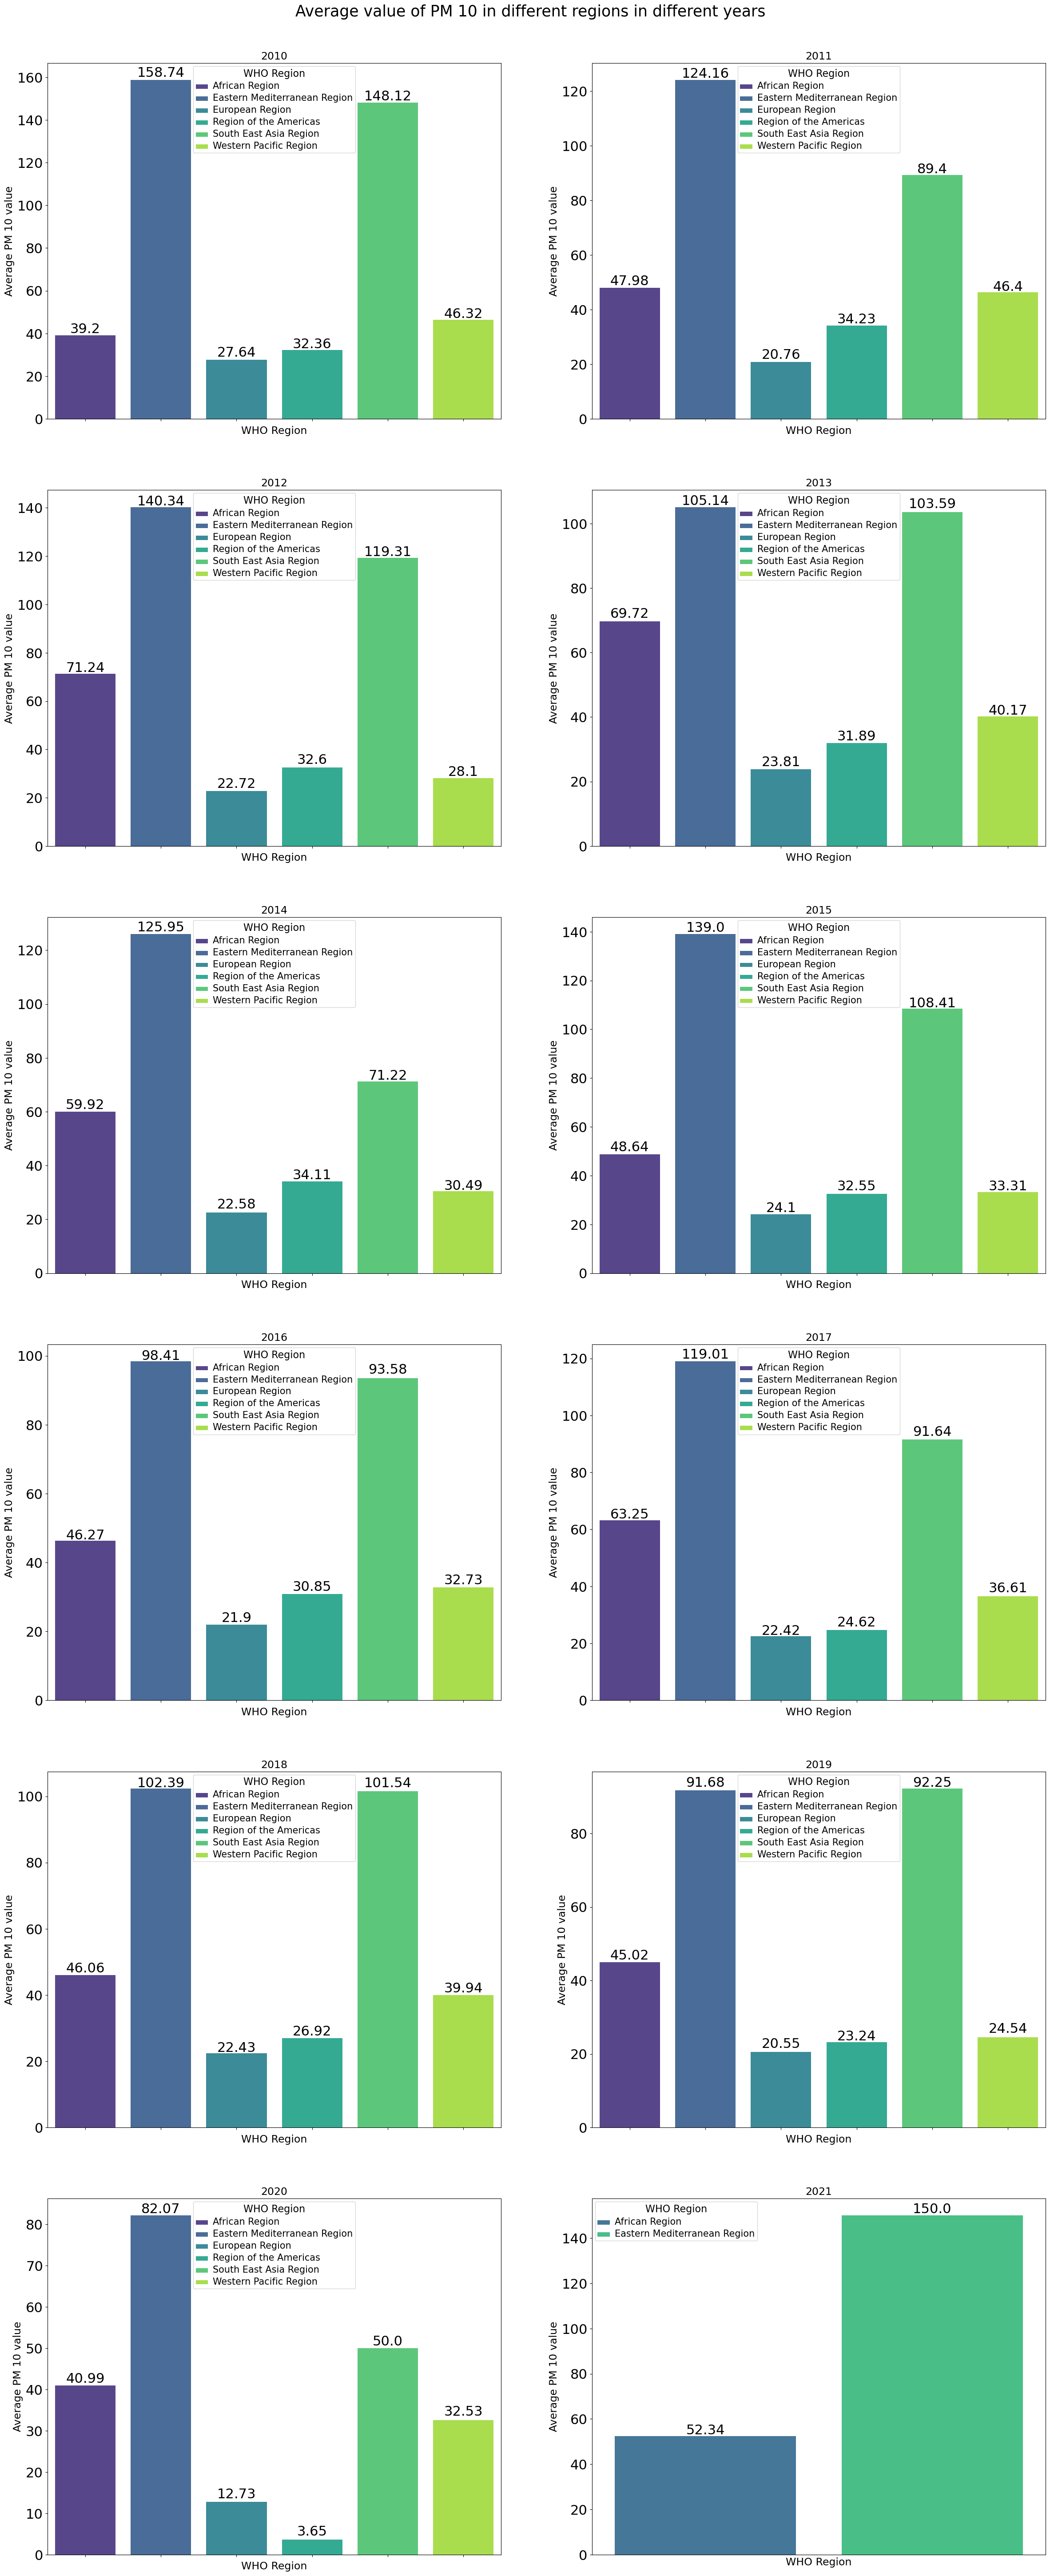

In [104]:
# fig, axes = plt.subplots(6, 2, figsize=(29, 88)) # for three figure in a page
fig, axes = plt.subplots(6, 2, figsize=(29, 66)) # for four figure in a page

# Call the function for each subplot
plot_bar_year_pm_10(axes[0,0],2010)
plot_bar_year_pm_10(axes[0,1], 2011)
plot_bar_year_pm_10(axes[1, 0], 2012)
plot_bar_year_pm_10(axes[1, 1],2013)
plot_bar_year_pm_10(axes[2, 0], 2014)
plot_bar_year_pm_10(axes[2, 1],2015)
plot_bar_year_pm_10(axes[3, 0], 2016)
plot_bar_year_pm_10(axes[3, 1],2017)
plot_bar_year_pm_10(axes[4, 0], 2018)
plot_bar_year_pm_10(axes[4, 1],2019)
plot_bar_year_pm_10(axes[5, 0], 2020)
plot_bar_year_pm_10(axes[5, 1],2021)
plt.subplots_adjust(top=0.96)

plt.suptitle('Average value of PM 10 in different regions in different years', fontsize=25);

### Bar plot for NO2 with year

In [93]:
def plot_bar_year_NO2(ax,year): 
    sns.barplot(
        ax=ax,
        x=df_NO2[df_NO2['Measurement Year']==year].groupby('WHO Region')['NO2 (μg/m3)'].mean().index, 
        y=df_NO2[df_NO2['Measurement Year']==year].groupby('WHO Region')['NO2 (μg/m3)'].mean().values, 
        hue=df_NO2[df_NO2['Measurement Year']==year].groupby('WHO Region')['NO2 (μg/m3)'].mean().index, 
        ci=None, 
        orient='vertical', 
        palette='magma', 
        saturation=1.7, 
        dodge=False, 
        alpha=0.9
    )
    
    plt.xticks([])
    
    # Add labels on top of the bars
    ax.set(xticklabels=[])

    ax.set_yticklabels(ax.get_yticklabels(), fontsize=22)  # Increase y-axis tick label font size
    ax.set_xlabel('WHO Region', fontsize=17)  # Increase x-axis label font size
    ax.set_ylabel('Average NO2 value', fontsize=17)  # Increase y-axis label font size
    legend = ax.get_legend()
    legend.set_title("WHO Region", prop={'size': 16})  # Increase legend title font size
    for text in legend.texts:
        text.set_fontsize(15)
    
    ax.set_title(year,fontsize=17)
    
    for i, v in enumerate(df_NO2[df_NO2['Measurement Year']==year].groupby('WHO Region')['NO2 (μg/m3)'].mean().values):
        ax.text(
            i, 
            round(v), 
            str(round(v,2)), 
            color='black', 
            ha='center', 
            va='bottom',
            fontsize=22
        )


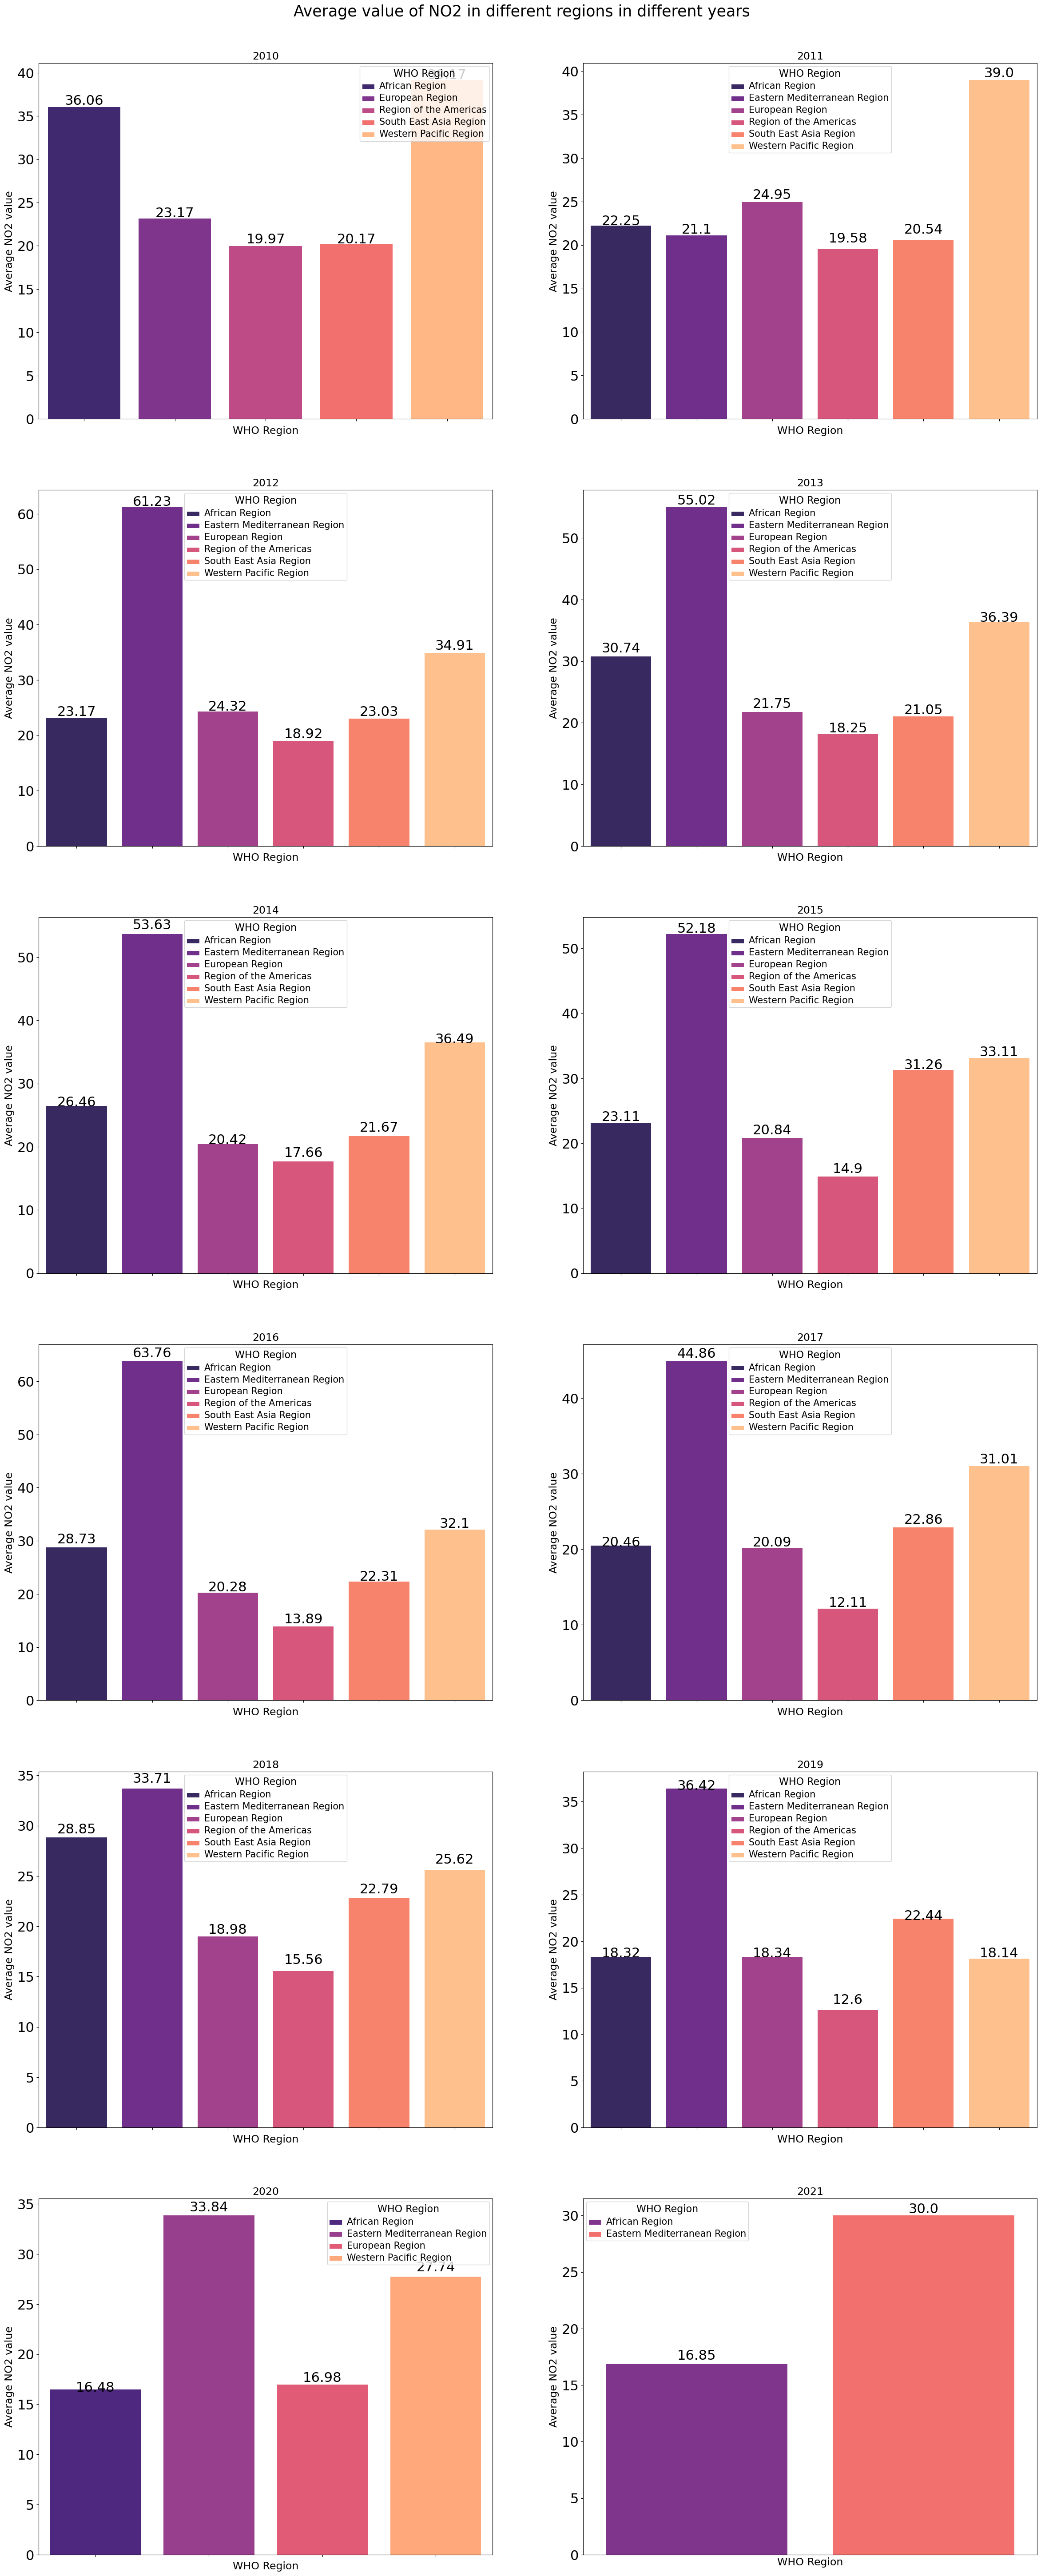

In [103]:
# fig, axes = plt.subplots(6, 2, figsize=(29, 88)) # for three figure in a page
fig, axes = plt.subplots(6, 2, figsize=(29, 66)) # for four figure in a page

# Call the function for each subplot
plot_bar_year_NO2(axes[0,0],2010)
plot_bar_year_NO2(axes[0,1], 2011)
plot_bar_year_NO2(axes[1, 0], 2012)
plot_bar_year_NO2(axes[1, 1],2013)
plot_bar_year_NO2(axes[2, 0], 2014)
plot_bar_year_NO2(axes[2, 1],2015)
plot_bar_year_NO2(axes[3, 0], 2016)
plot_bar_year_NO2(axes[3, 1],2017)
plot_bar_year_NO2(axes[4, 0], 2018)
plot_bar_year_NO2(axes[4, 1],2019)
plot_bar_year_NO2(axes[5, 0], 2020)
plot_bar_year_NO2(axes[5, 1],2021)
plt.subplots_adjust(top=0.96)

plt.suptitle('Average value of NO2 in different regions in different years', fontsize=25);

## Conclusions:
1. Average Value of PM 2.5 of Western Pacific Countires
- maximum: Mongolia (73.87)
- minimum: Fiji (7.56)
2. Average Value of PM 2.5 of South East Asia Region Countries
- maximum: Bangladesh (75.13)
- minimum: Myanmar (18.08)
3.  Average Value of PM 2.5 of Region of Americas Countries
- maximum: Honduras (36.00)
- minimum: Bahamas (4.16)
4.  Average Value of PM 2.5 of European Region Countries
- maximum: Tajakistan (71.52)
- minimum: Iceland (5.59)
5. Average Value of PM 2.5 of Eastern Mediterranean Region Countries
- maximum: Afganistan (119.77)
- minimum: Jordan (22.91)
6. Average Value of PM 2.5 of African Region
- maximum: Cameroon (82.67)
- minimum: Kenya (8.35)

#### Afganistan has highest average value of PM 2.5
#### Bahamas has the lowest average value of PM 2.5

1. Average Value of PM 10 of Western Pacific Countires
- maximum: Mongolia (169.22)
- minimum: New Zealand (16.52)
2. Average Value of PM 10 of South East Asia Region Countries
- maximum: Bangladesh (139.39)
- minimum: Maldives (20.00)
3.  Average Value of PM 10 of Region of Americas Countries
- maximum: Bolivia (70.76)
- minimum: Bahamas (4.65)
4.  Average Value of PM 10 of European Region Countries
- maximum: North Macedonia (53.96)
- minimum: Iceland (10.61)
5. Average Value of PM 10 of Eastern Mediterranean Region Countries
- maximum: Pakistan (333.54)
- minimum: Morocco (38.12)
6. Average Value of PM 10 of African Region
- maximum: Ghana (175.38)
- minimum: Kenya (18.65)

#### Pakistan has the highest average value of PM 10
#### Bahamas has the lowest average value of PM 10

1. Average Value of NO2 of Western Pacific Countires
- maximum: Mongolia (46.4)
- minimum: Australia (9.77)
2. Average Value of NO2 of South East Asia Region Countries
- maximum: Bangladesh (33.88)
- minimum: Myanmar (6.81)
3.  Average Value of NO2 of Region of Americas Countries
- maximum: Costa Rica (40.71)
- minimum: Trinidad and Tobago (9.6)
4.  Average Value of NO2 of European Region Countries
- maximum: Monaco (33.71)
- minimum: Estonia (6.78)
5. Average Value of NO2 of Eastern Mediterranean Region Countries
- maximum: Iran (69.44)
- minimum: Morocco (18.15)
6. Average Value of NO2 of African Region
- maximum: Senegal (23.91)
- minimum: Mauritius (14.95)

#### Iran has the highest average value of NO2
#### Eastonia has the lowest average value of NO2

1. There are 88.63% of cities in the world that have PM 2.5 value of less than 50 μg/m3

2. There are 84.5% of cities in the world that have PM 10 value less than 50 μg/m3

3. There are few countries that have PM 10 value greater than 300.

4. The NO2 level in almost every city is less than 50 μg/m3